![Yulu Bike](https://yulu-blogs-cdn.yulu.bike/Whats_App_Image_2020_03_24_at_2_44_59_PM_5e10ac592e.jpeg)

## <span style="color:green">About Yulu</span>
#### <span style="color: black;">Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!</span>

## <span style="color:green">Problem Statement </span>

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

•	Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

•	How well those variables describe the electric cycle demands


## <span style="color:green">Task </span>

### <span style="color:green">Task 1: Exploratory Data Analysis</span>
### <span style="color:blue">Task 1.1: Analyzing Basic Metrics</span>
### <span style="color:blue">Task 1.2: Data Preprocessing</span>
### <span style="color:blue">Task 1.3: Non Graphical Analysis</span>
### <span style="color:blue">Task 1.4: Visual Analysis</span>
#### <span style="color:orange">Sub Task 1.4.1: Univariate Analysis</span>
#### <span style="color:orange">Sub Task 1.4.2: Bivariate Analysis</span>
#### <span style="color:orange">Sub Task 1.4.3: Multivariate Analysis</span>
### <span style="color:green">Task 2: Hypothesis Testing</span>
### <span style="color:green">Task 3: Actionable Insights</span>
### <span style="color:green">Task 4: Recommendations</span>

### <span style="color:green">Data Source</span>

[Yulu Dataset](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

Column Profiling:

•	datetime: datetime

•	season: season (1: spring, 2: summer, 3: fall, 4: winter)

•	holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

•	workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

•	weather:

o	1: Clear, Few clouds, partly cloudy, partly cloudy

o	2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

o	3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

o	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

•	temp: temperature in Celsius

•	atemp: feeling temperature in Celsius

•	humidity: humidity

•	windspeed: wind speed

•	casual: count of casual users

•	registered: count of registered users

•	count: count of total rental bikes including both casual and registered


### <span style="color:green">Task 1: Exploratory Data Analysis</span>
### <span style="color:blue">Task 1.1: Analyzing Basic Metrics</span>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install tabulate
!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,zscore,boxcox,probplot
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind,ttest_rel,ttest_1samp,mannwhitneyu
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway,kruskal,shapiro,levene,kstest
from scipy.stats import pearsonr,spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

In [3]:
# Let's import the dataset
yulu_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

yulu_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
#let's check the details of our dataset
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
yulu_df.shape

(10886, 12)

In [6]:
#Let's check the datatypes of columns
yulu_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
# Let's check the presence of null values
yulu_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# Let's check the presence of duplicate values
yulu_df.duplicated().sum()

0

### Insights:

#### In the dataset, we have 10,886 rows and 12 columns
#### There are no null values and no duplicate values
#### The variable datetime is object type, columns like season, holiday, workingday, weather, humidity, casual, registered and count are of integer type while temp, atemp and windspeed are of float type.

### <span style="color:blue">Task 1.2: Data Preprocessing</span>

In [9]:
# Let's convert some columns to appropriate datatypes
# the datatype of datetime should be of datetime

yulu_df['datetime'] = pd.to_datetime(yulu_df['datetime'])

# similarly, season, holiday, workingday, weather are categorical so let's change the datatype

cols_to_convert = ['season','holiday','workingday','weather']
for col in cols_to_convert:
  yulu_df[cols_to_convert]= yulu_df[cols_to_convert].astype('category')

yulu_df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [10]:
#Let's extract year, month,hour from datetime column for ease of analysis
yulu_df['year'] = yulu_df['datetime'].dt.year
yulu_df['month'] = yulu_df['datetime'].dt.month
yulu_df['hour'] = yulu_df['datetime'].dt.hour
yulu_df['month'] = yulu_df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})
yulu_df['day'] = yulu_df['datetime'].dt.day
yulu_df['day'] = yulu_df['day'].replace({1: 'Sunday',
                                        2: 'Monday',
                                        3: 'Tuesday',
                                        4: 'Wednesday',
                                        5: 'Thursday',
                                        6: 'Friday',
                                        0: 'Saturday'})

In [11]:
yulu_df.describe(include = 'category').T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


In [12]:
#Let's check the presence of null values post datatype conversion
yulu_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
hour          0
day           0
dtype: int64

In [13]:
#Let's check the statistical summary of numerical columns
yulu_df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,hour
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,11.541613
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,6.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,12.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,18.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,23.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,6.915838


In [14]:
yulu_df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int32
month                 object
hour                   int32
day                   object
dtype: object

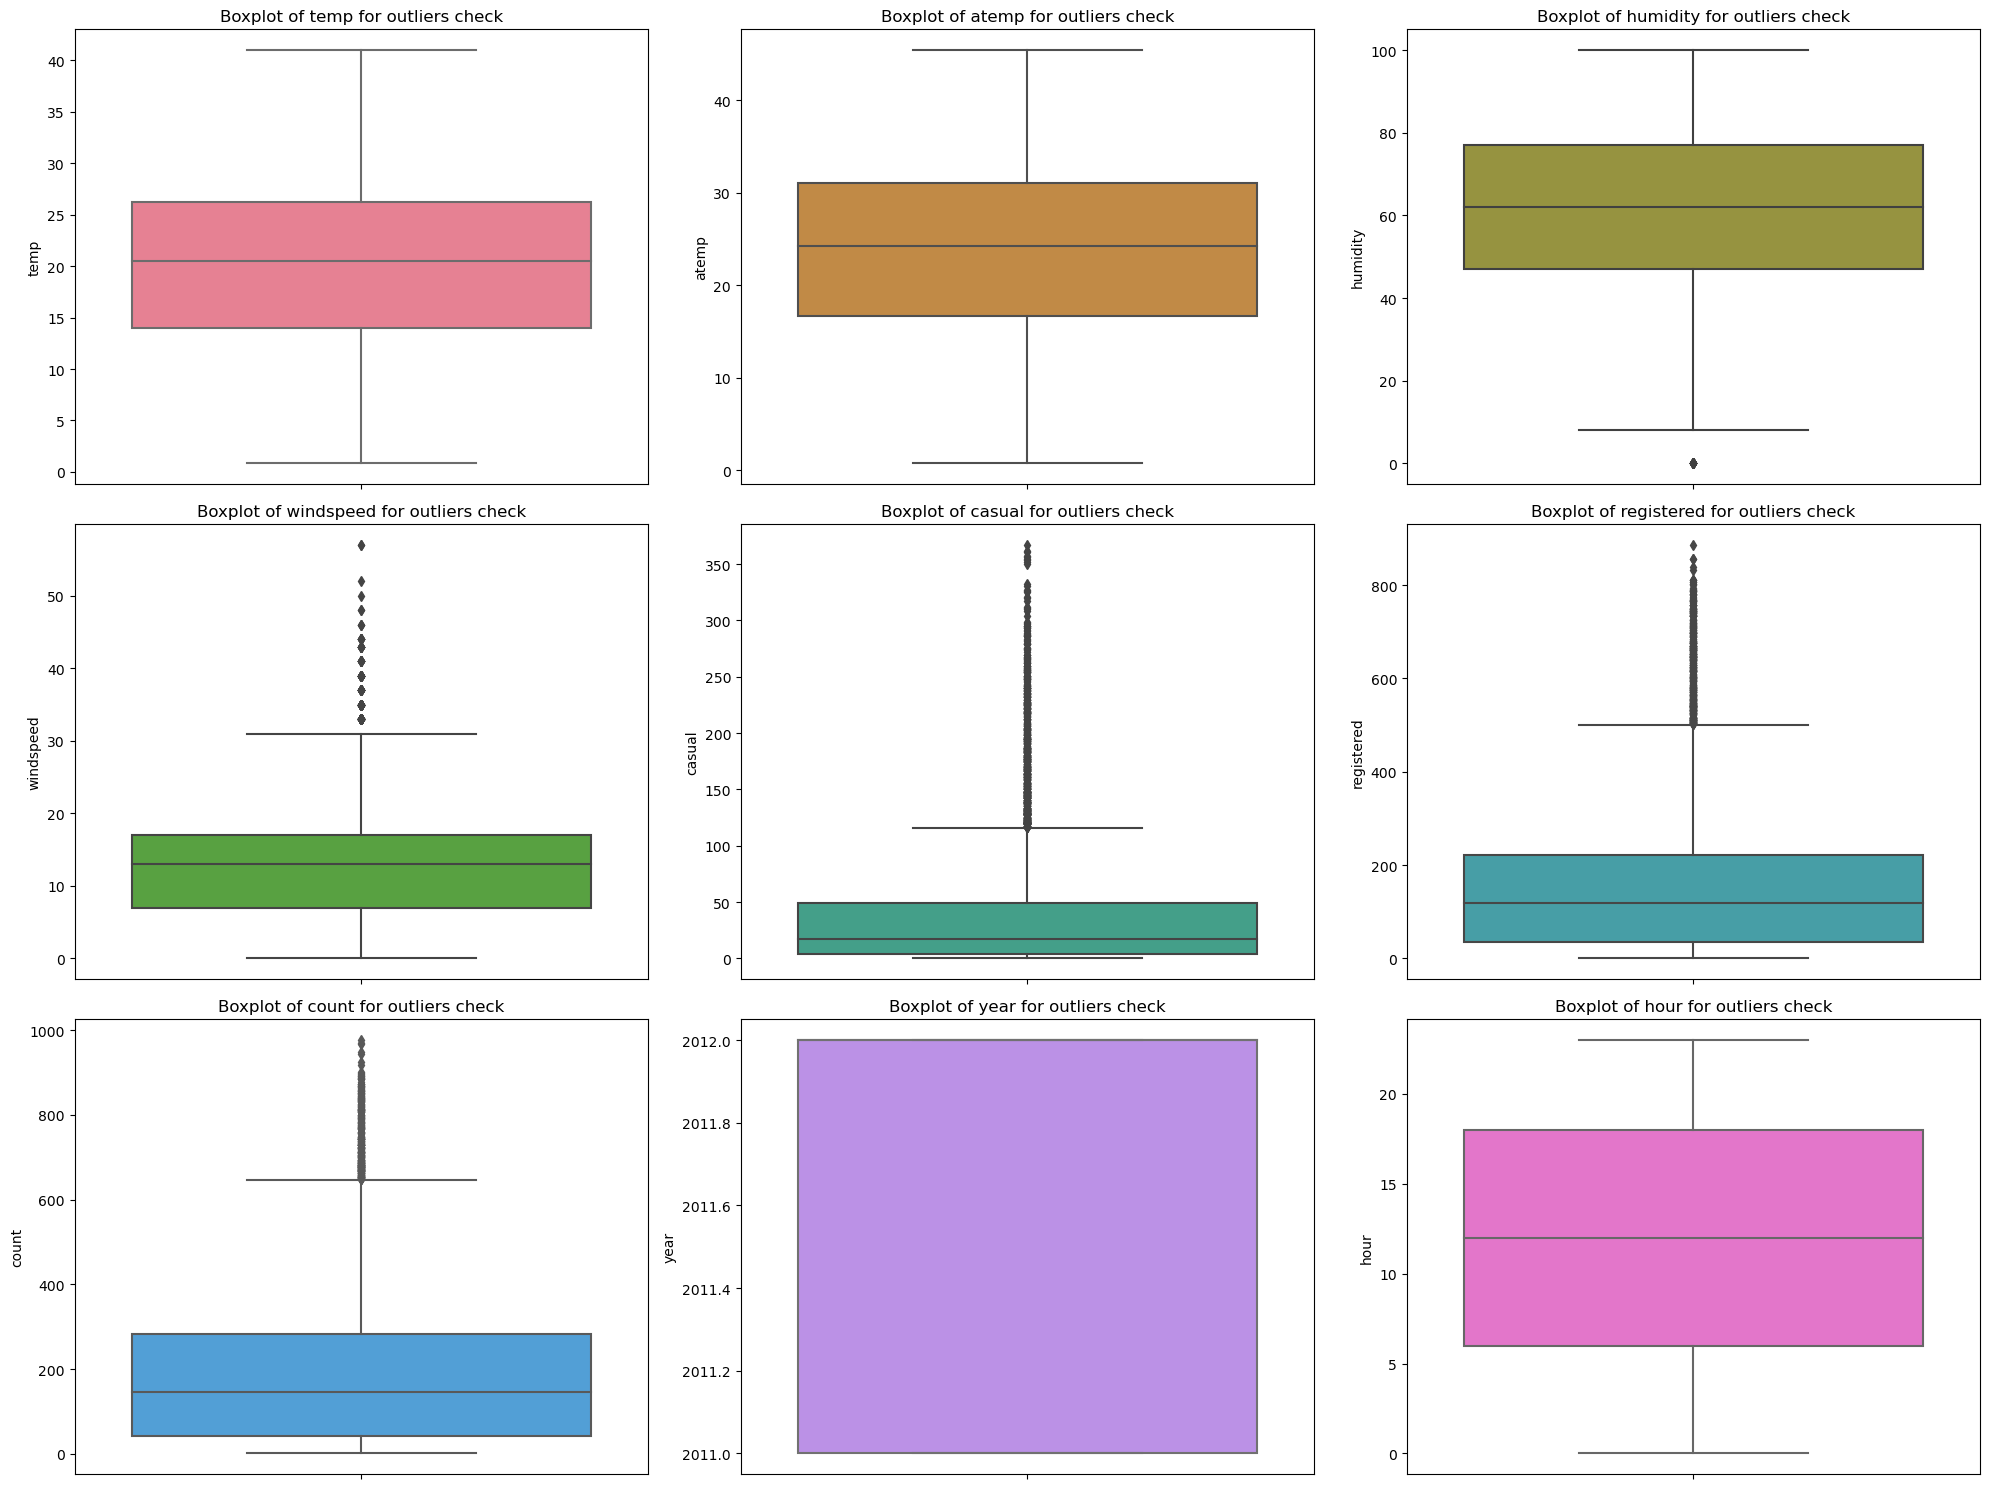

In [15]:
# Let's check the presence of outliers in numerical data
# List of numerical columns based on the provided datatypes
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 
                     'casual', 'registered', 'count', 'year', 'hour']

# Setting up the number of subplots based on the number of numerical columns
plt.figure(figsize=(20, 15))

palette = sns.color_palette("husl", len(numerical_columns))

# Looping through each numerical column and create a boxplot with a color from the palette
for i, (col, color) in enumerate(zip(numerical_columns, palette), 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on your needs
    sns.boxplot(data=yulu_df, y=col, color=color)
    plt.title(f'Boxplot of {col} for outliers check')

# Adjusted layout to prevent overlapping
plt.tight_layout()
plt.show()

#### *temp, atemp, humidity, hour*: These columns do not exhibit significant outliers. The distribution appears to be within normal ranges, so we will not perform outlier treatment for these columns.

#### *windspeed*: There are a few outliers present above the upper whisker. The distribution is skewed, so we will apply the IQR method to treat these outliers.

#### *casual, registered, count*: These columns have a significant number of outliers, particularly on the higher end. The distribution is highly skewed with many data points lying outside the whiskers. We will apply the IQR method to these columns to address the outliers.

#### *year*: The boxplot shows a single constant value for this column, suggesting that the data might only contain one unique value. Outlier treatment isn't relevant.

In [16]:
#let's perform IQR for windspeed, casual, registered, count

cols = ['windspeed','casual','registered','count']

def flag_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a new column to flag outliers: 1 if outlier, 0 otherwise
        df[f'{column}_outlier'] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)
    
    return df

# Apply the IQR method to flag outliers in the specified columns
df_flagged = flag_outliers_iqr(yulu_df, cols)

# Filter the dataframe to show only the flagged outliers
outlier_conditions = (df_flagged[[f'{col}_outlier' for col in cols]] == 1).any(axis=1)
outliers_df = df_flagged[outlier_conditions]

# Display the outlier rows
outliers_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,day,windspeed_outlier,casual_outlier,registered_outlier,count_outlier
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95,2011,January,14,8,1,0,0,0
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69,2011,January,17,8,1,0,0,0
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19,2011,January,9,9,1,0,0,0
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49,2011,January,11,9,1,0,0,0
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55,2011,January,12,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,572,2012,December,17,18,0,0,1,0
10856,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,525,2012,December,18,18,0,0,1,0
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678,2012,December,8,19,0,0,1,1
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,2012,December,17,19,0,0,1,0


#### Combinely in these 4 columns we have 1347 outliers.

### <span style="color:blue">Task 1.3: Non Graphical Analysis</span>

In [17]:
yulu_df['season']= yulu_df['season'].map(str)
season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
yulu_df["season"] = yulu_df["season"].map(lambda x: season_mapping[x])


yulu_df['holiday']= yulu_df['holiday'].map(str)
holiday_mapping = {'0':'no', '1':'yes'}
yulu_df["holiday"] = yulu_df["holiday"].map(lambda x: holiday_mapping[x])

yulu_df['workingday']= yulu_df['workingday'].map(str)
working_day_mapping = {'0':'no', '1':'yes'}
yulu_df["workingday"] = yulu_df["workingday"].map(lambda x: working_day_mapping[x])

yulu_df['weather']= yulu_df['weather'].map(str)
weather_mapping = {'1':'clear', '2':'partly_cloudy', '3':'rain', '4':'heavy rain'}
yulu_df["weather"] = yulu_df["weather"].map(lambda x: weather_mapping[x])

In [18]:
# Let's do valuecounts and unique attributes
# Let's do unique attribute counts for season
yulu_df['season'].unique()



['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

In [19]:
print(yulu_df['season'].value_counts())

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64


In [20]:
# Let's do unique attribute counts for holiday
yulu_df['holiday'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [21]:
print(yulu_df['holiday'].value_counts())

holiday
no     10575
yes      311
Name: count, dtype: int64


In [22]:
# Let's do unique attribute counts for workingday
yulu_df['workingday'].unique()

['no', 'yes']
Categories (2, object): ['no', 'yes']

In [23]:
print(yulu_df['workingday'].value_counts())

workingday
yes    7412
no     3474
Name: count, dtype: int64


In [24]:
# Let's do unique attribute counts for weather
yulu_df['weather'].unique()

['clear', 'partly_cloudy', 'rain', 'heavy rain']
Categories (4, object): ['clear', 'partly_cloudy', 'rain', 'heavy rain']

In [25]:
print(yulu_df['weather'].value_counts())

weather
clear            7192
partly_cloudy    2834
rain              859
heavy rain          1
Name: count, dtype: int64


In [26]:
# Let's do unique attribute counts for temp
yulu_df['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [27]:
print(yulu_df['temp'].value_counts())

temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: count, dtype: int64


In [28]:
# Let's do unique attribute counts for atemp
yulu_df['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [29]:
print(yulu_df['atemp'].value_counts())

atemp
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: count, dtype: int64


In [30]:
# Let's do unique attribute counts for humidity
yulu_df['humidity'].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91], dtype=int64)

In [31]:
print(yulu_df['humidity'].value_counts())

humidity
88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: count, Length: 89, dtype: int64


In [32]:
# Let's do unique attribute counts for windspeed
yulu_df['windspeed'].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [33]:
print(yulu_df['windspeed'].value_counts())

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64


### <span style="color:blue">Task 1.4: Visual Analysis</span>
#### <span style="color:orange">Sub Task 1.4.1: Univariate Analysis</span>

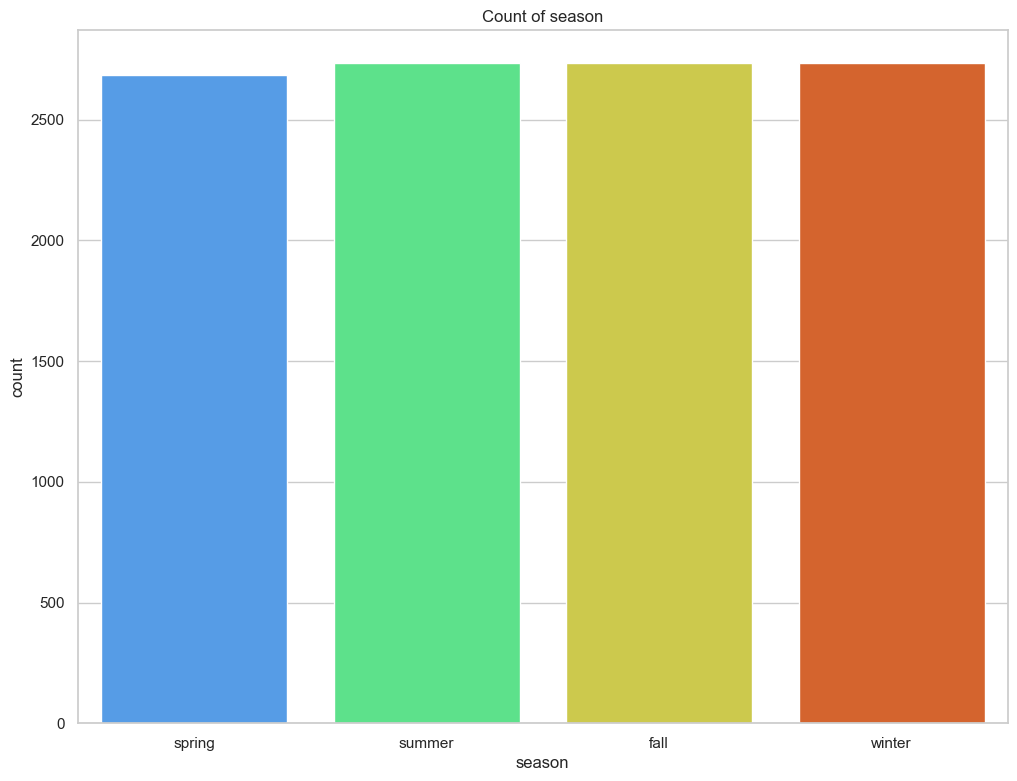

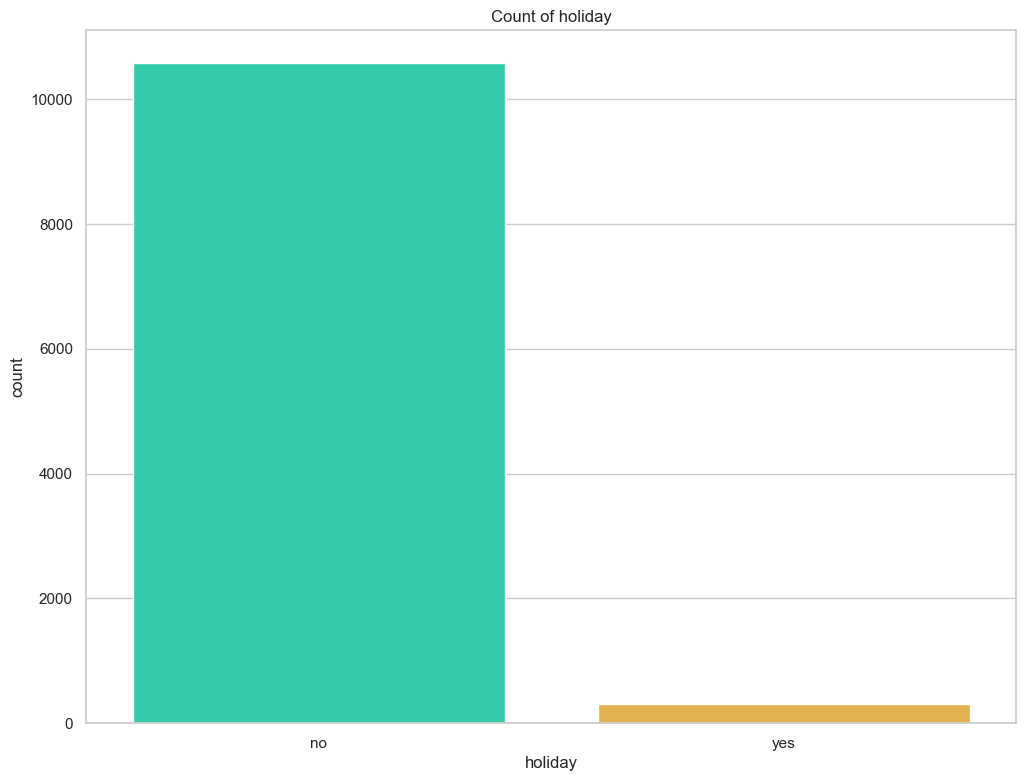

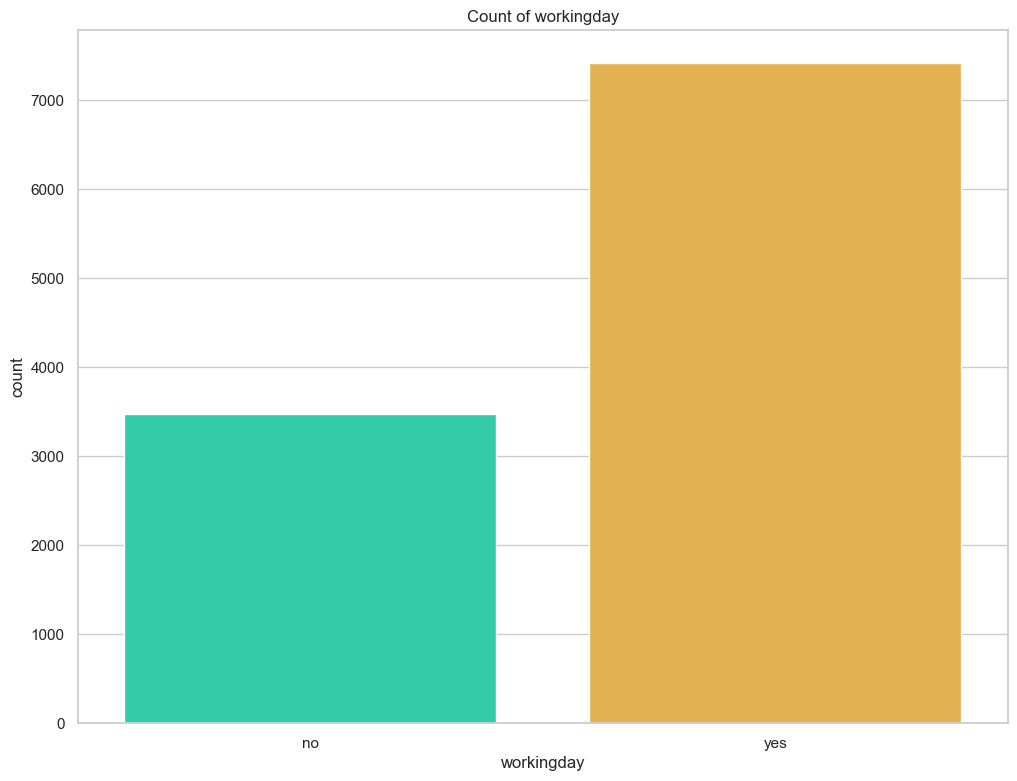

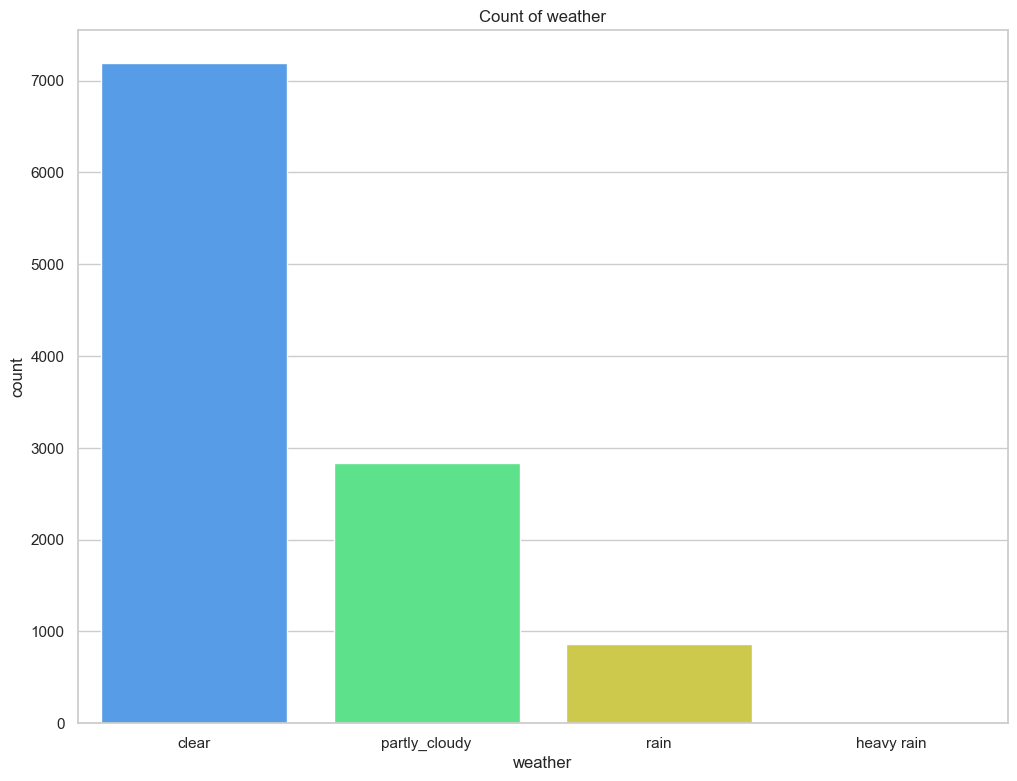

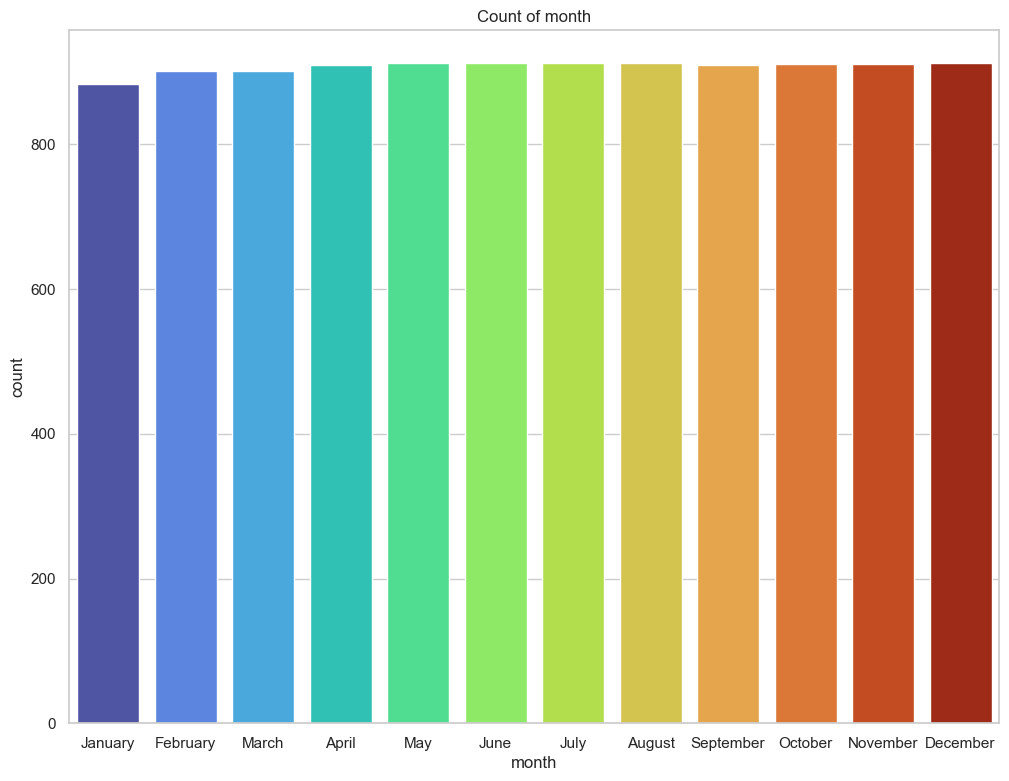

In [34]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Category Data: Bar Plots
category_columns = ['season', 'holiday', 'workingday', 'weather', 'month']

for col in category_columns:
    plt.figure(figsize=(12, 9))
    sns.countplot(x=col, data=yulu_df, palette ='turbo')
    plt.title(f'Count of {col}')
    plt.show()




##### Most of the bike riders count are on workingdays.
##### Riders count are maximum on clear weather, mostly from July to December of fall and winter seasons.

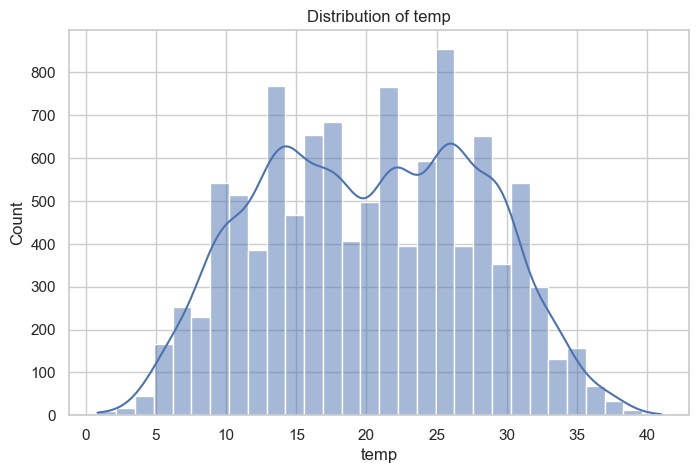

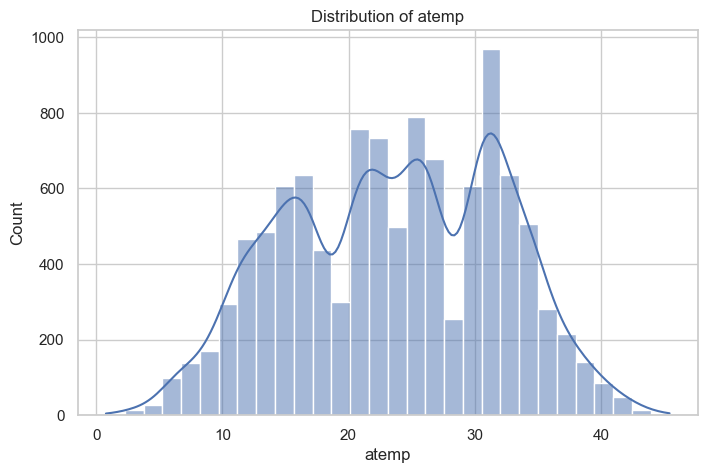

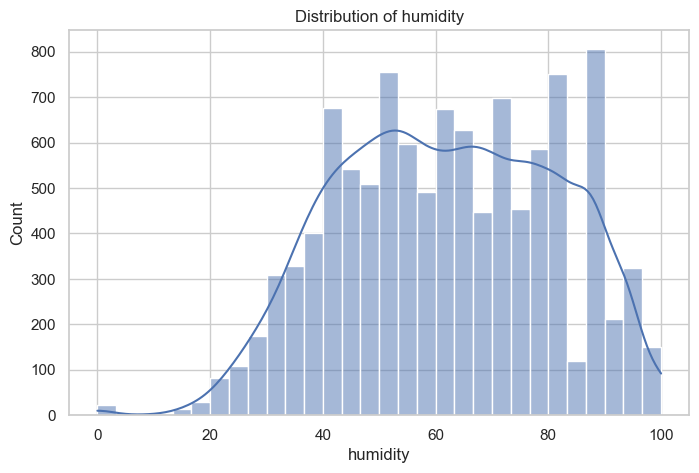

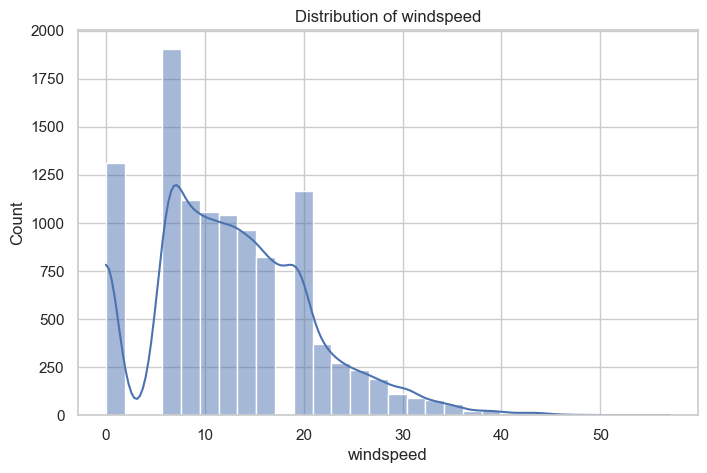

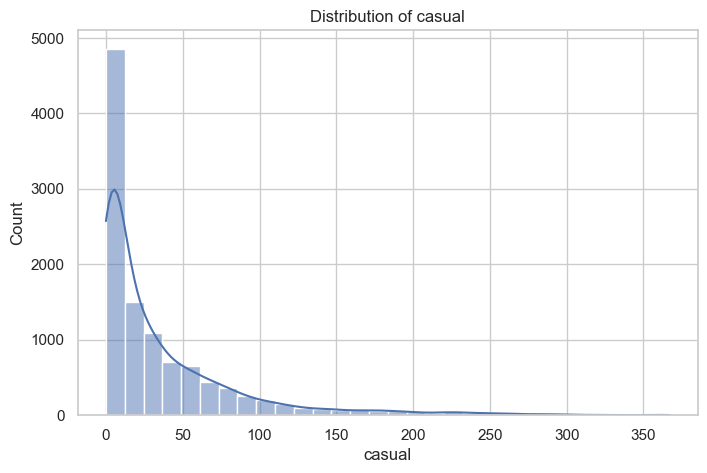

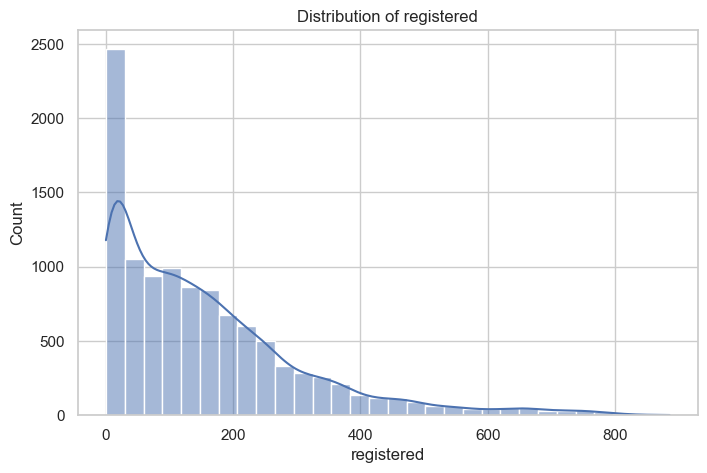

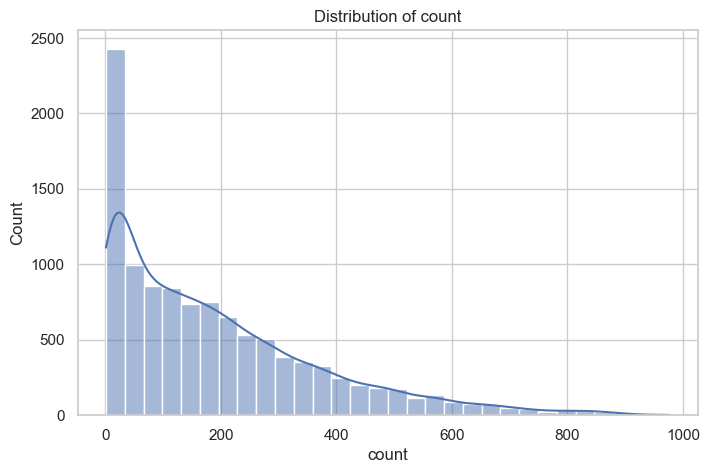

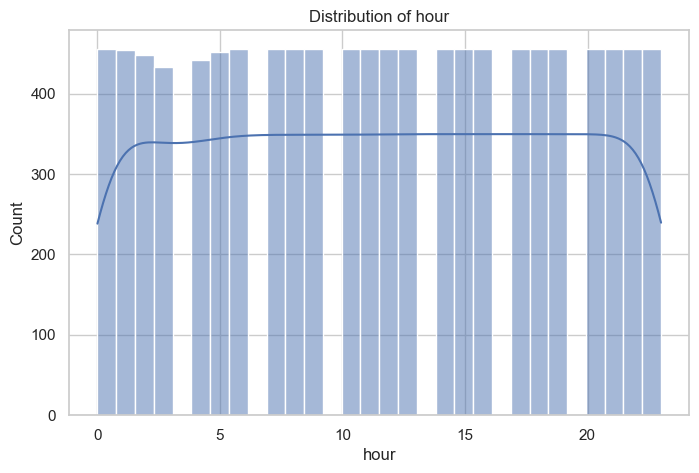

In [35]:
# 2. Numerical Data: Histograms and Density Plots
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(yulu_df[col], kde=True, bins=30)  # Histogram with KDE overlay
    plt.title(f'Distribution of {col}')
    plt.show()


##### The "temp" data exhibits a right-skewed distribution with a long tail, indicating a few high temperature values.

##### The "atemp" data exhibits a right-skewed distribution with a long tail, indicating a few high temperature values. The mode is around 25-30, and the distribution is leptokurtic.

##### The humidity data exhibits a right-skewed distribution with a long tail, indicating a few high humidity values. The mode is around 40-50, and the distribution is leptokurtic.

##### The wind speed data exhibits a right-skewed, multimodal distribution with a long tail. This suggests that while most wind speeds are relatively low, there are occasional high wind speeds that occur less frequently.

##### The distribution of casual users is right-skewed with a long tail, indicating a few large values that pull the mean to the right. The mode is around 0, and the distribution is likely leptokurtic.

##### The distribution of registered users is also right-skewed, indicating that most registered users or entities have lower values. There is a large concentration of values at the lower end, with the frequency decreasing as the registered count increases. This suggests that registration is common at lower levels but less frequent at higher levels.

##### This distribution of count is heavily right-skewed, with the majority of counts clustered near the lower end of the scale. The histogram shows a high frequency of low values (between 0 and 100), and the density drops off rapidly as the count increases. This suggests that most events or observations have a relatively low count, with fewer occurrences of high counts.

##### The distribution of hour is relatively flat indicating that the count of events is fairly consistent across all hours of the day. There is a slight dip at the early and late hours (around 0 and 23), which could suggest lower activity during those times.

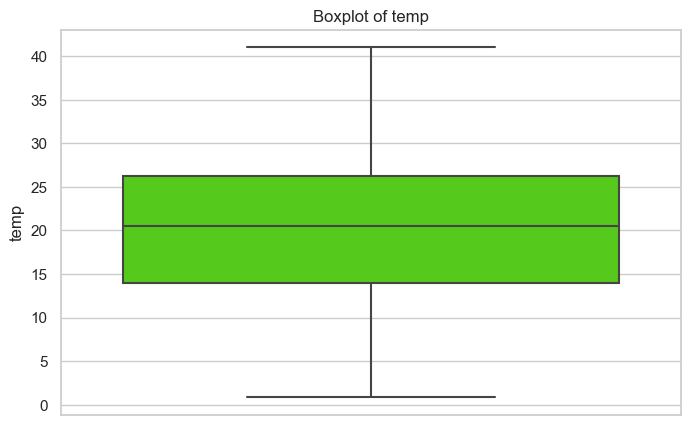

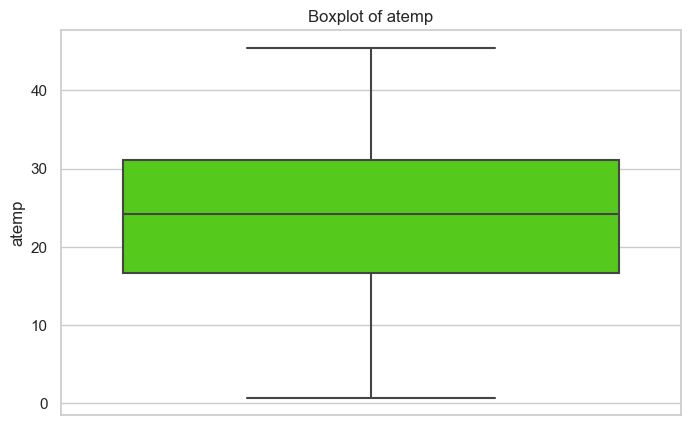

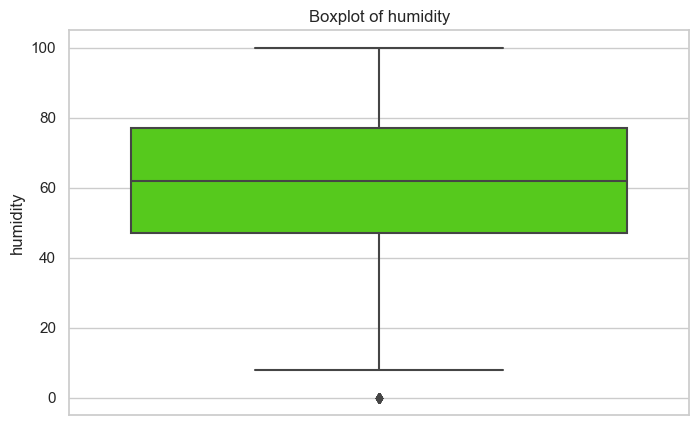

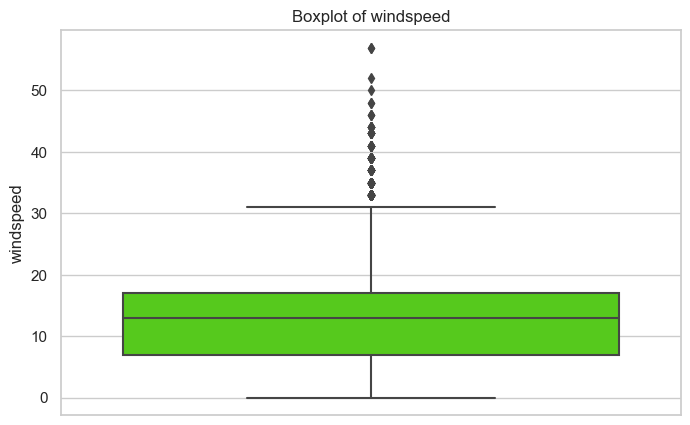

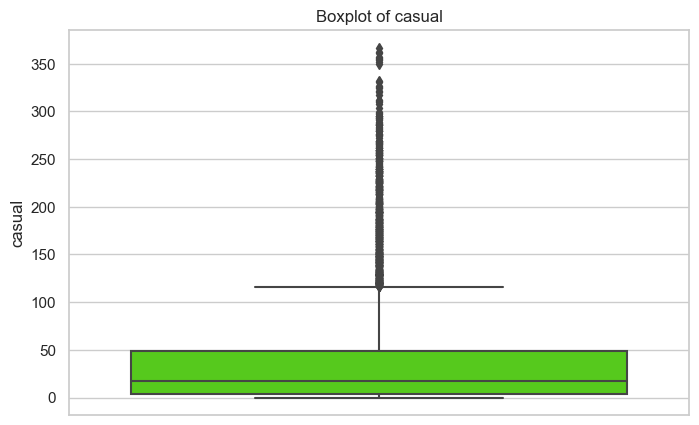

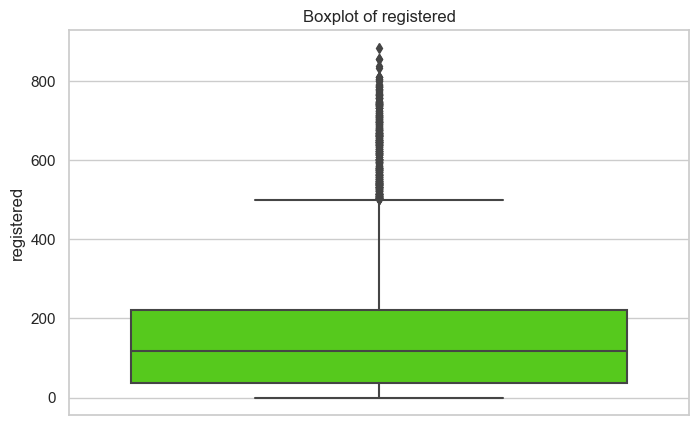

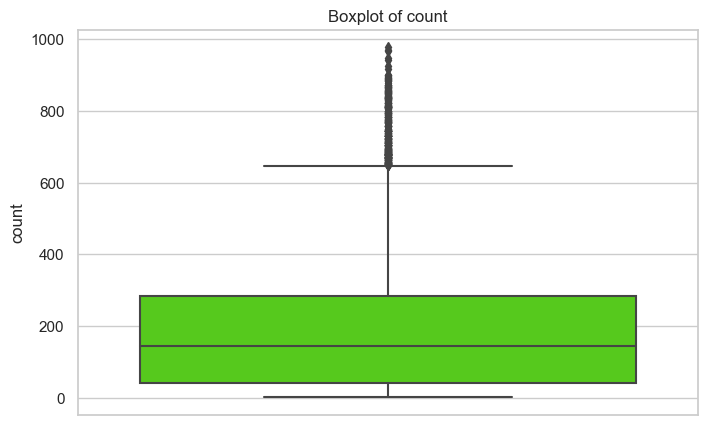

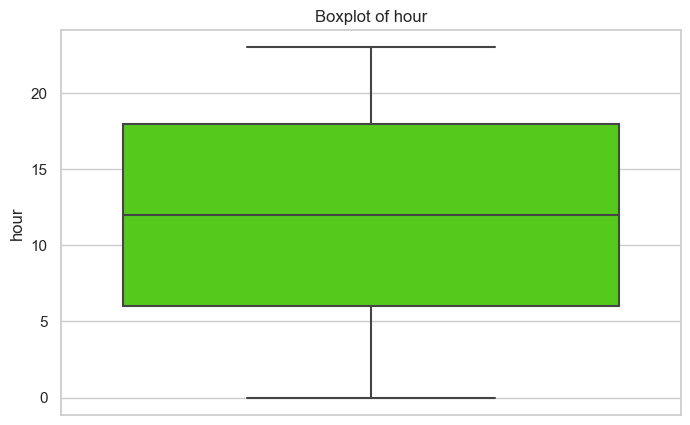

In [36]:
# 3. Numerical Data: Box Plots
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=yulu_df[col], color = '#4ce600')
    plt.title(f'Boxplot of {col}')
    plt.show()


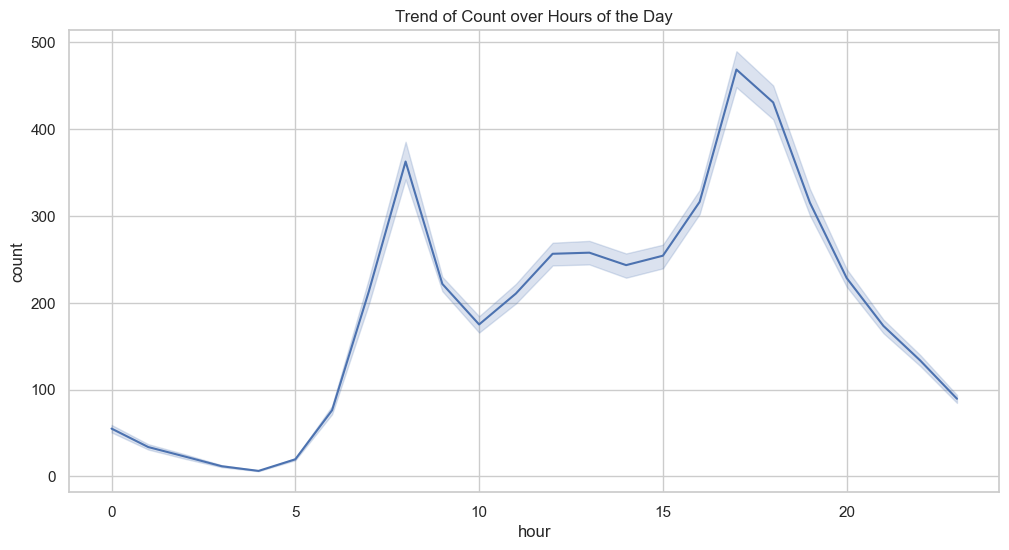

In [37]:
# 4. Line Plot for 'hour' (observing trends over hours of the day)
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=yulu_df)
plt.title('Trend of Count over Hours of the Day')
plt.show()

##### The trend shows higher rider count in morning between 7 to 9 AM and in the evening between  5:00 PM to 7:00 PM.

#### <span style="color:orange">Sub Task 1.4.2: Bivariate Analysis</span>

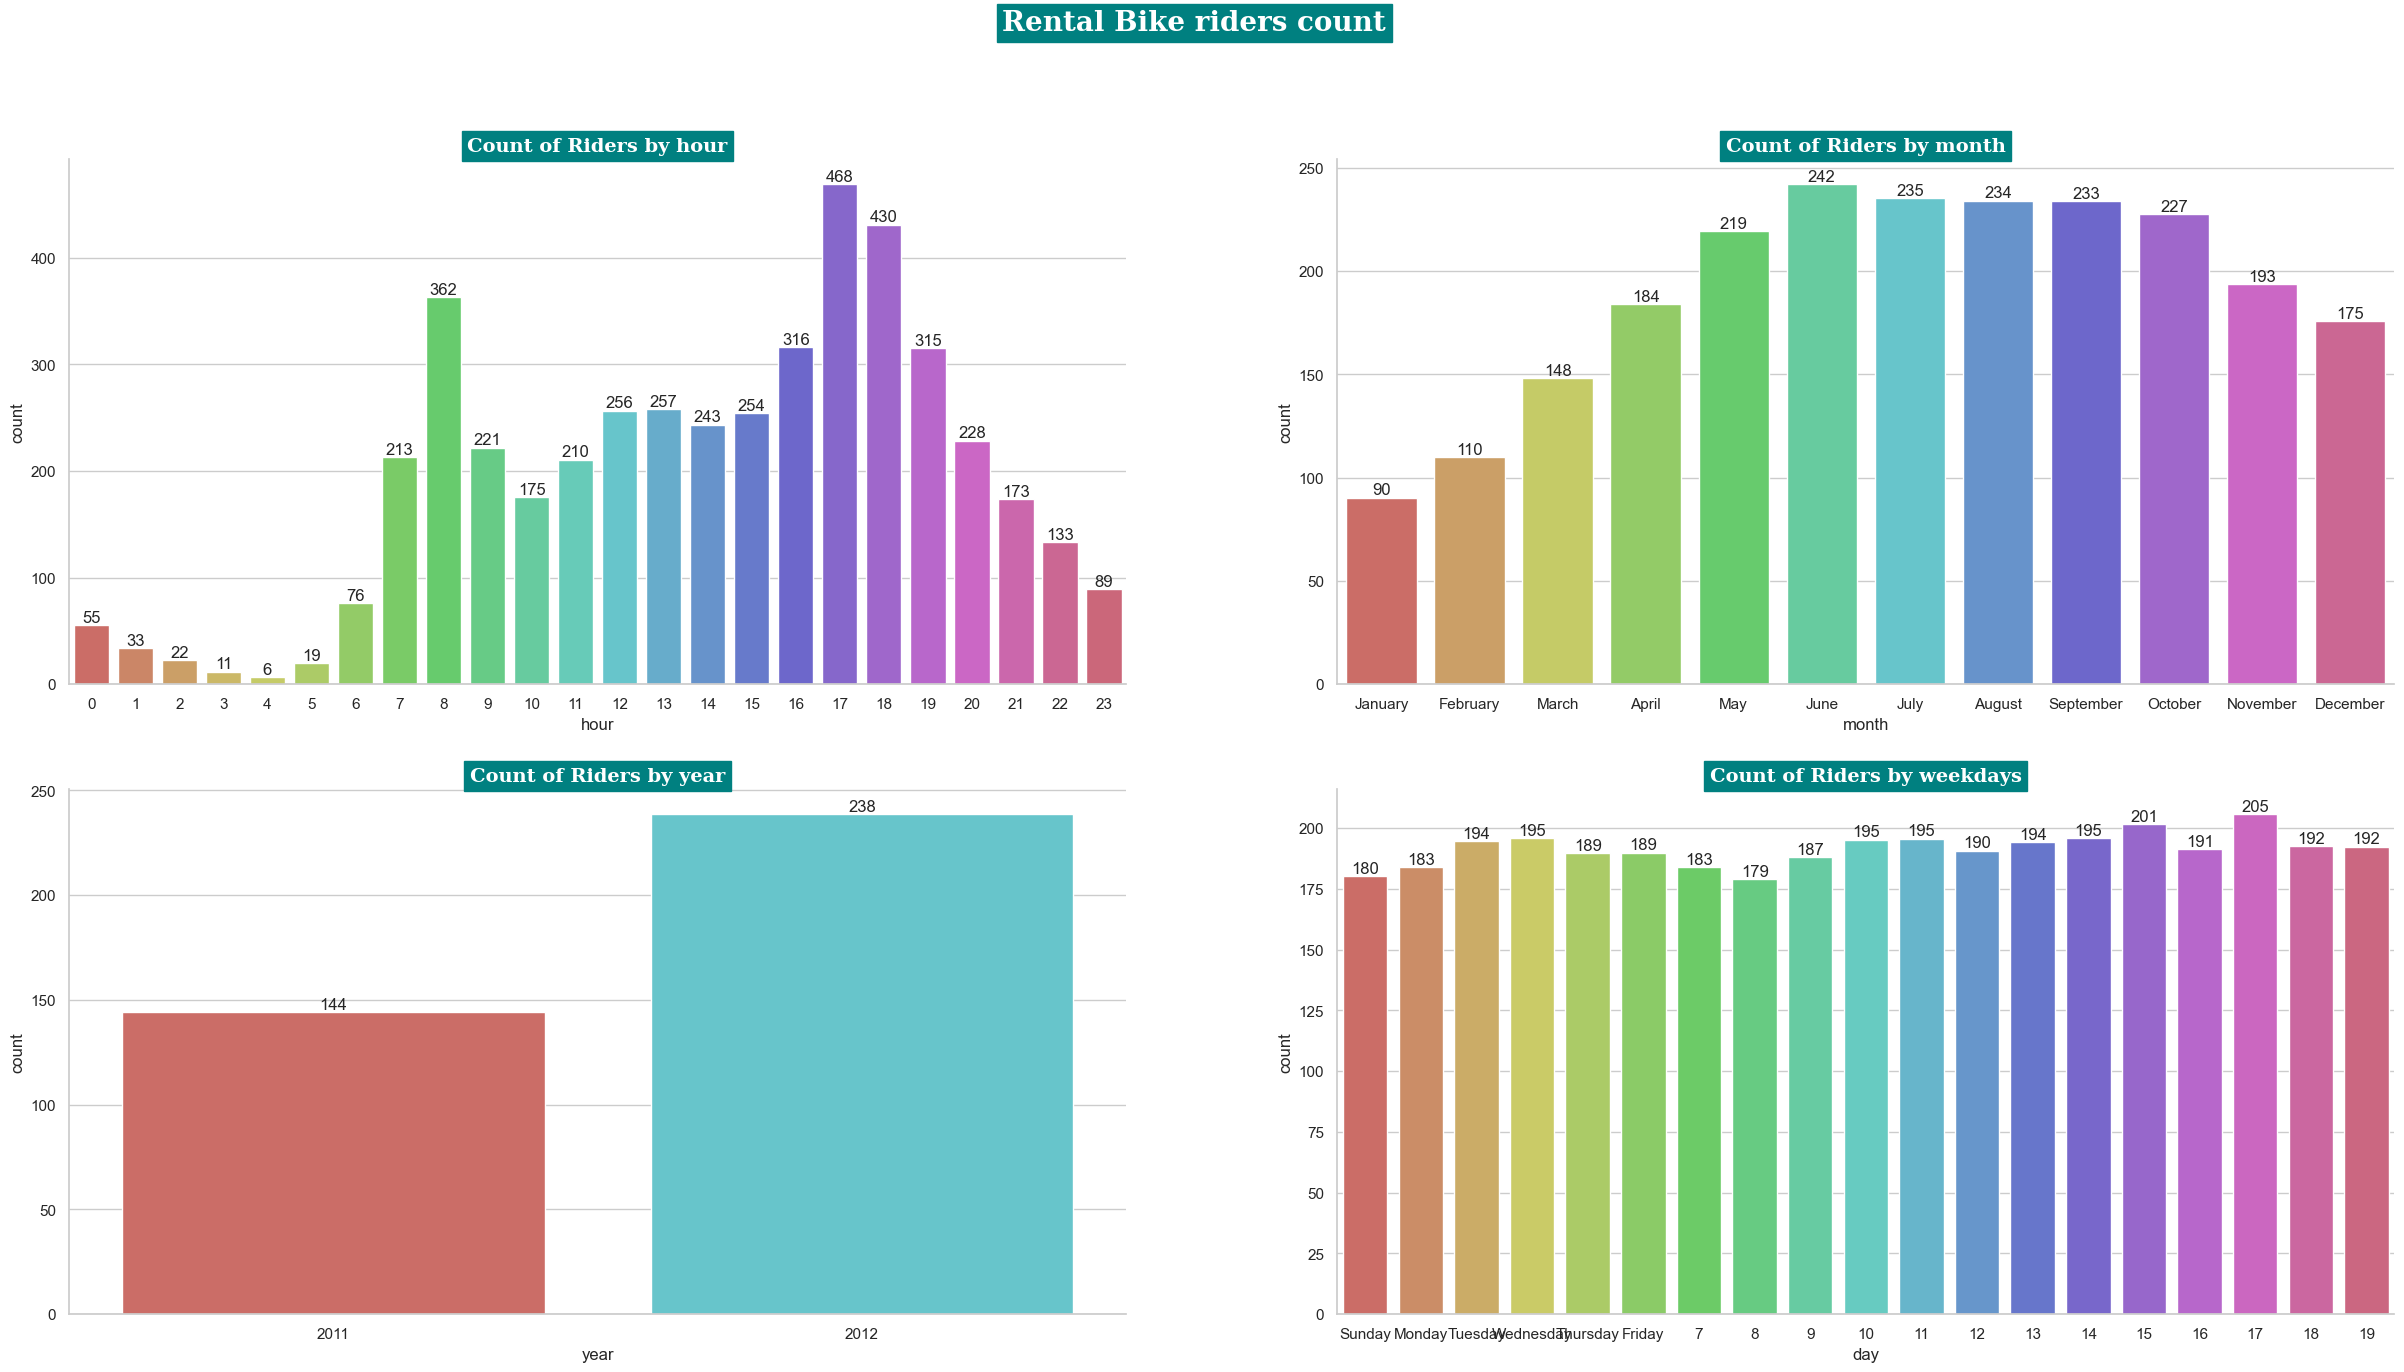

In [38]:
#Let's perform analysis to check rental bike riders count w.r.t different columns
plt.figure(figsize=(30,15))
plt.suptitle('Rental Bike riders count',fontsize=20,fontfamily='serif',backgroundcolor='teal',fontweight='bold',color='w')

plt.subplot(221)
b=sns.barplot(data=yulu_df, x="hour", y="count",palette='hls',ci=None)
b.bar_label(b.containers[0],fmt='%d') # %d-int 
plt.title('Count of Riders by hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(222)
b=sns.barplot(data=yulu_df, x="month", y="count",palette='hls',ci=None)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Count of Riders by month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(223)
b=sns.barplot(data=yulu_df, x="year", y="count",palette='hls',ci=None)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Count of Riders by year',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')

plt.subplot(224)
b=sns.barplot(data=yulu_df, x="day", y="count",palette='hls',ci=None)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Count of Riders by weekdays',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')
sns.despine()

plt.show()

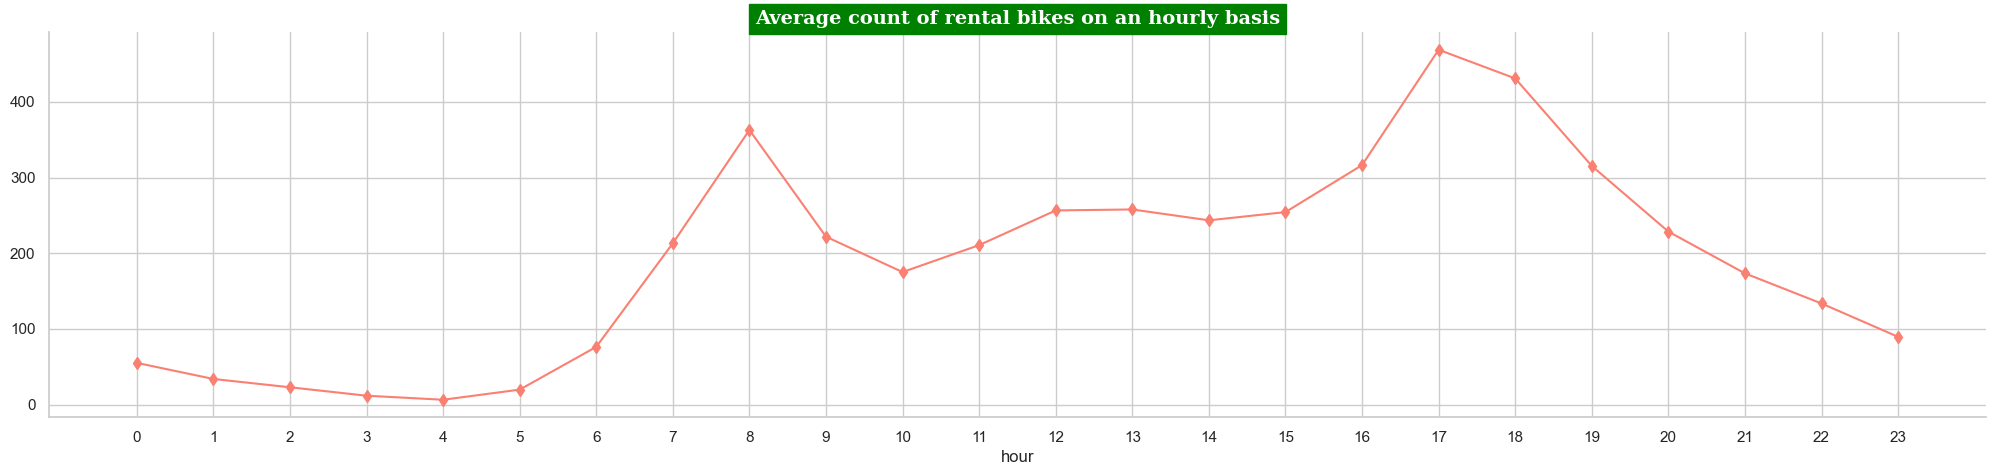

In [39]:
# Let's check the average count of rental bikes per hour basis
plt.figure(figsize = (25,5))
plt.title("Average count of rental bikes on an hourly basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='green',color='w')
yulu_df.groupby('hour')['count'].mean().plot(kind = 'line', marker = 'd',color= "salmon")
plt.xticks(np.arange(0, 24))
sns.despine()
plt.show()

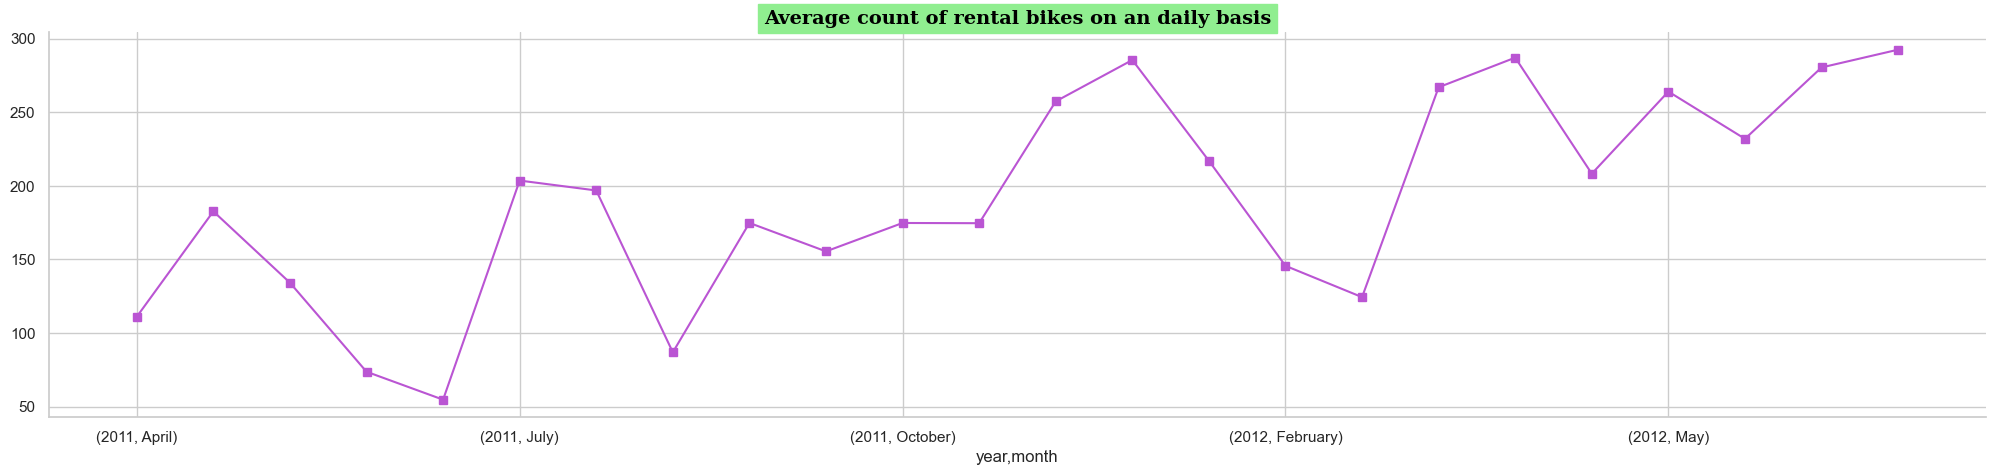

In [40]:
#Let's check the count of bikes on day basis
plt.figure(figsize = (25,5))
plt.title("Average count of rental bikes on an daily basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='lightgreen',color='black')
yulu_df.groupby(['year','month'])['count'].mean().plot(kind = 'line', marker = 's',color= 'mediumorchid')
sns.despine()
plt.show()

#### <span style="color:orange">Sub Task 1.4.3: Multivariate Analysis</span>

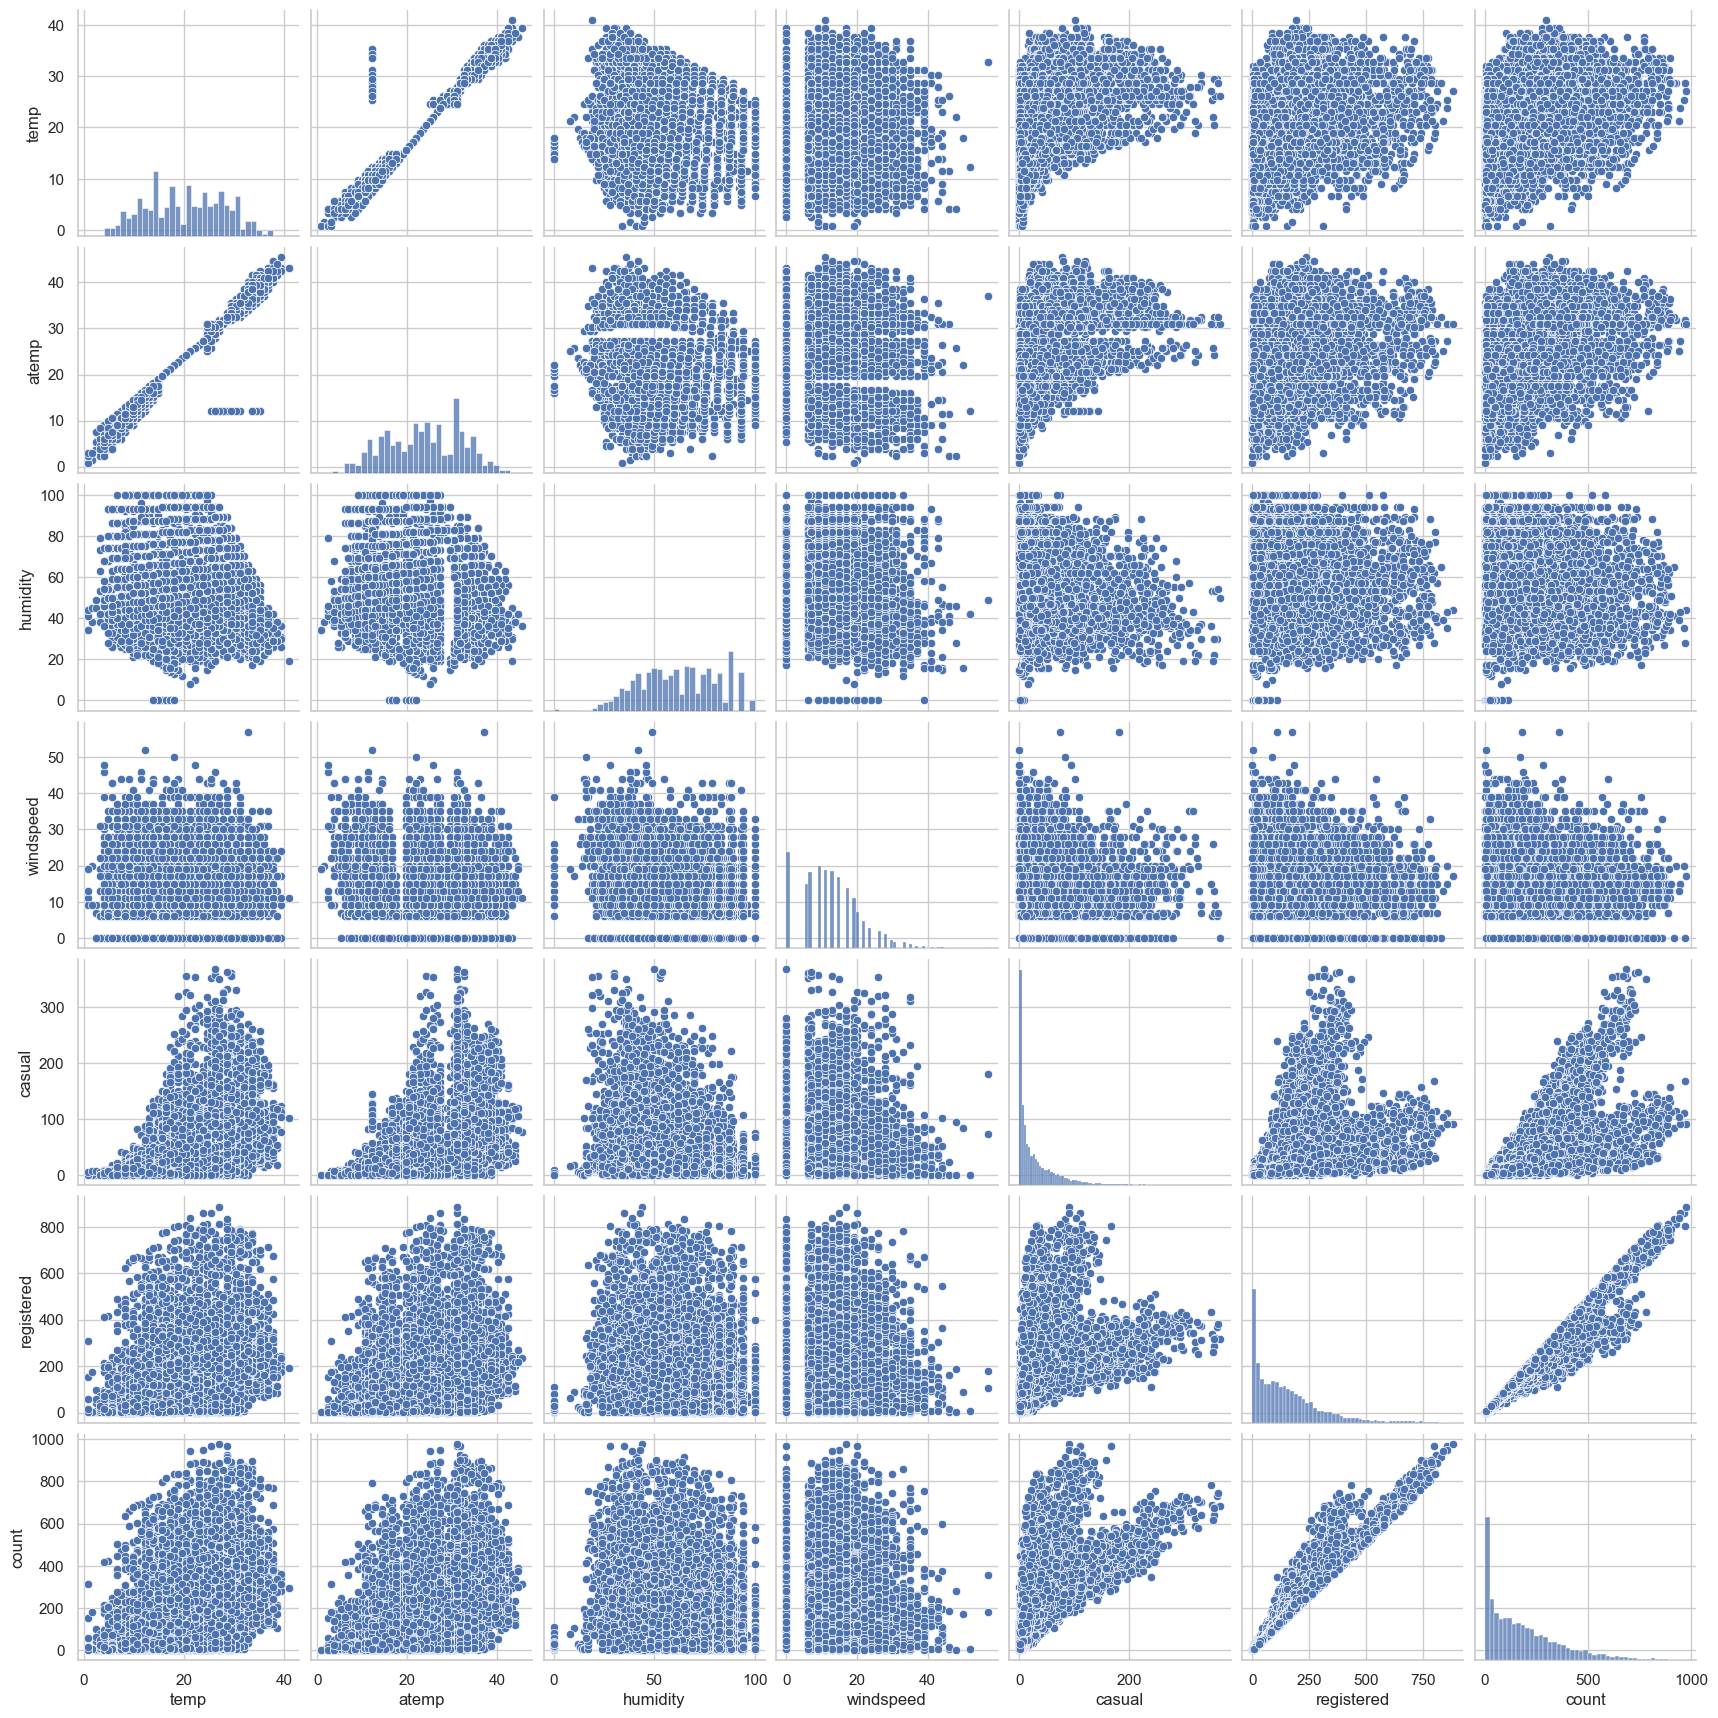

In [41]:
#Let's see pairplots for our numerical datatype columns
# Select only numerical columns
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Create pairplot
sns.pairplot(yulu_df[numerical_columns])

# Display the plot
plt.show()

##### 1. Temperature (temp) and Adjusted Temperature (atemp): (High Correlation): There is a strong linear relationship between temp and atemp, indicating that these two variables are very similar or derived from one another.

##### 2. Temperature (temp), Adjusted Temperature (atemp) vs. Count (count): (Positive Relationship): Both temp and atemp show a positive relationship with the total count, suggesting that bike rentals tend to increase with temperature.

##### 3. Humidity vs. Count (count): (Negative Relationship): There is a weak negative relationship between humidity and count, indicating that bike rentals decrease slightly as humidity increases. The relationship is not strong, but it’s noticeable.

##### 4. Windspeed vs. Count (count): (No Strong Relationship): The scatterplot of windspeed vs. count does not show a clear pattern, suggesting that windspeed might not have a strong direct effect on the total number of bike rentals.

##### 5. Casual vs. Registered Users: (Different Patterns): There is a distinct pattern in the casual vs. registered plot. The relationship shows some clustering, which may suggest different behaviors between casual and registered users. Registered users have higher counts in general, whereas casual users are more spread out and lower in number.

##### 6. Casual vs. Count (count): (Strong Positive Relationship): There is a strong positive relationship between the number of casual users and the total count, indicating that as the number of casual users increases, the total count of bike rentals also increases.

##### 7. Registered vs. Count (count): (Very Strong Positive Relationship): The plot shows a very strong linear relationship, suggesting that the total count is largely driven by registered users.

##### 8. Temperature (temp/atemp) vs. Casual/Registered Users: (Different Trends): The temperature seems to have a stronger influence on casual users than on registered users. As temperature increases, casual user numbers increase more noticeably, while registered users show a less pronounced increase.

##### 9. Distribution Insights: (Skewed Distributions): The histograms along the diagonal reveal that many variables, such as windspeed, casual, and registered, are skewed, with most of the data concentrated at the lower end of the scale.

##### 10. Humidity vs. Casual/Registered: (Moderate Negative Relationship): Both casual and registered users decrease as humidity increases, but this effect seems slightly stronger for casual users.

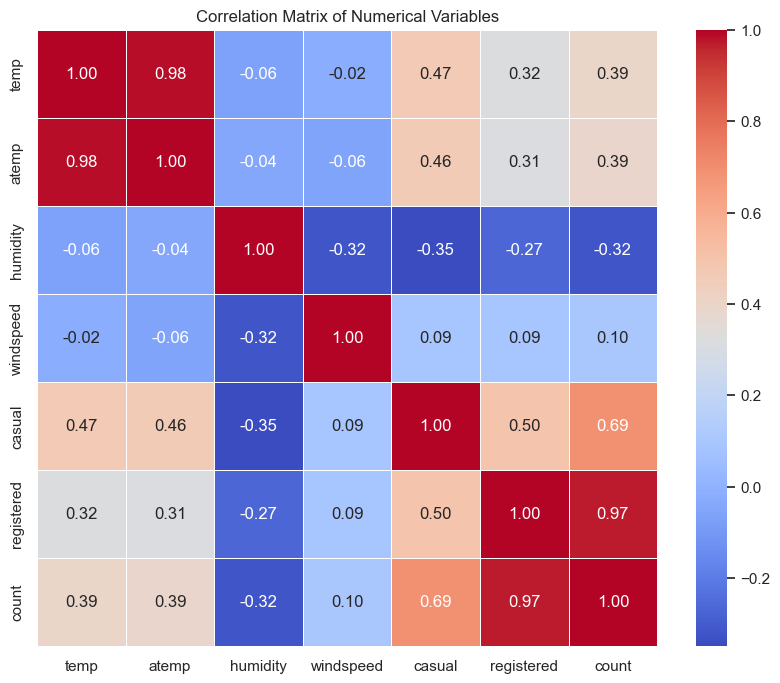

In [42]:
#Let's check the correlation of numerical variables
# Select the numerical columns
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Calculate the correlation matrix
corr_matrix = yulu_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

##### The correlation matrix reveals strong positive relationships between temp and atemp, registered and count, as well as casual and count. Humidity appears to have negative correlations with most other variables.

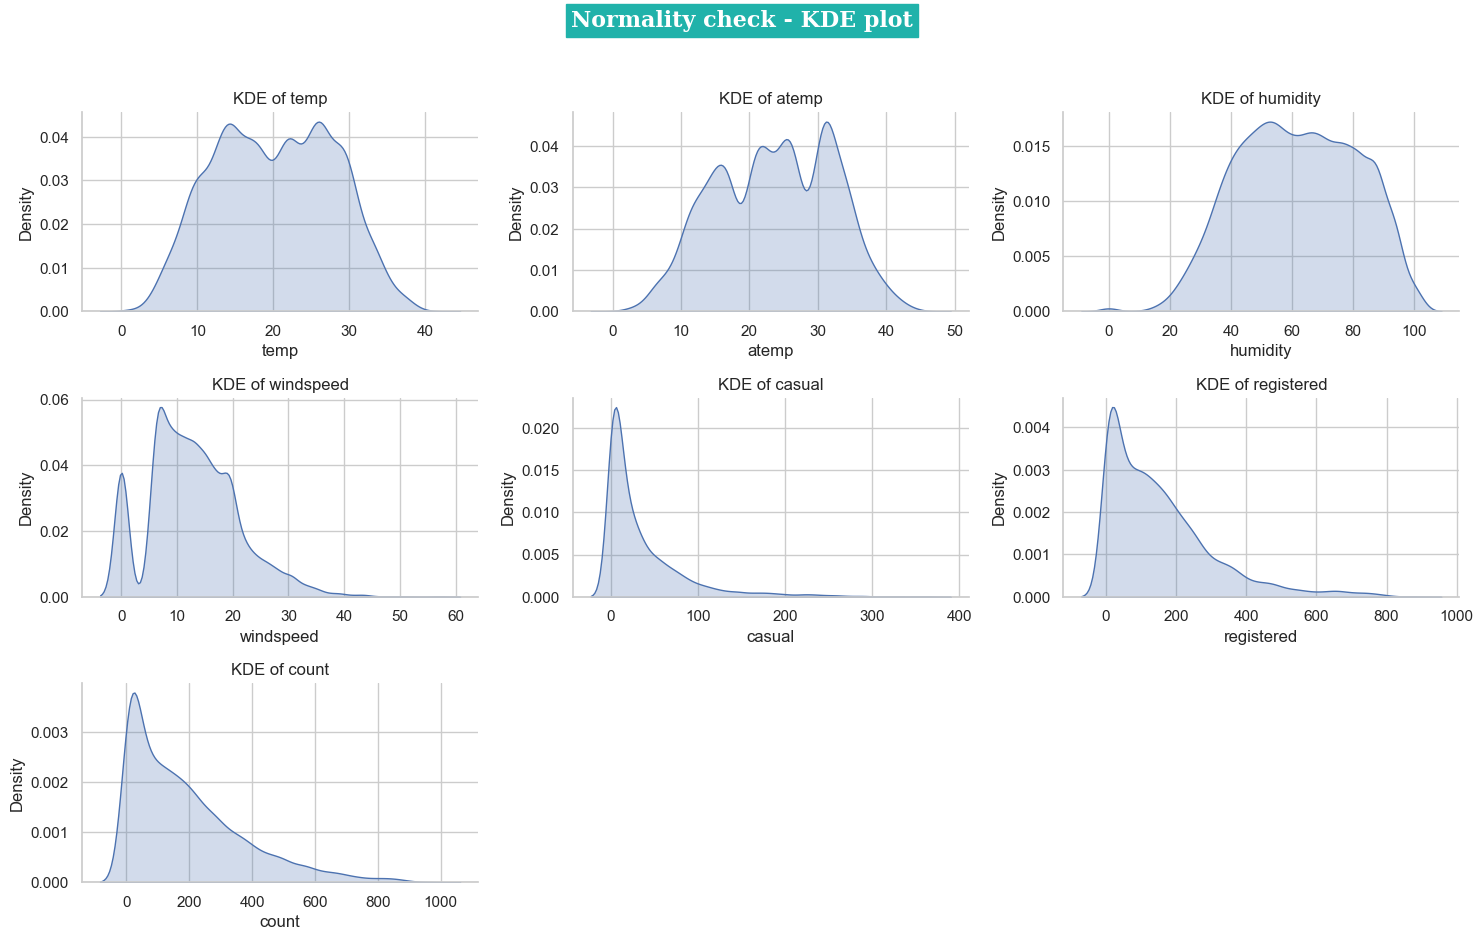

In [43]:
# Let's check the normality of data
# Set the figure size
plt.figure(figsize=(15, 12))
plt.suptitle('Normality check - KDE plot', fontsize=16, fontfamily='serif', fontweight='bold',
             backgroundcolor='lightseagreen', color='w')

# Iterate through each numerical column and plot a KDE for each
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(yulu_df[col], shade=True)
    plt.title(f'KDE of {col}', fontsize=12)

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

##### Temperature (temp) and Adjusted Temperature (atemp): Both temp and atemp exhibit a bimodal distribution, with two peaks around the mid-20s. The data suggests that the temperatures are commonly concentrated around these values, indicating the presence of two distinct temperature ranges.

##### Humidity: The humidity distribution is skewed to the left, with a peak around 60-80%. This indicates that most of the data points have moderate to high humidity levels.

##### Windspeed: The windspeed plot shows a highly right-skewed distribution with a peak near zero. This suggests that low wind speeds are more common in the dataset.

##### Casual Users (casual): The distribution of casual users is heavily skewed to the right, with most values concentrated at the lower end. This indicates that there are generally fewer casual users, with some instances of higher usage.

##### Registered Users (registered): The registered users' distribution is also right-skewed but with a broader spread compared to casual. This suggests that registered users are more common, but the number can vary significantly.

##### Total Count (count): The total count of users is right-skewed, similar to the registered and casual distributions. Most of the data points are concentrated at lower values, with some occurrences of higher usage.

### <span style="color:green">Task 2: Hypothesis Testing</span>

#### Q1:  The effect of workingday on number of electric cycles rented

#### Step- 1: Setting up Null & Alternate Hypothesis

##### *Null Hypotheis(H0): Workingday has no effect on number of cycles rented

##### *Alternate Hypothesis(HA): Workingday has some effect on the number of cycles rented

[]

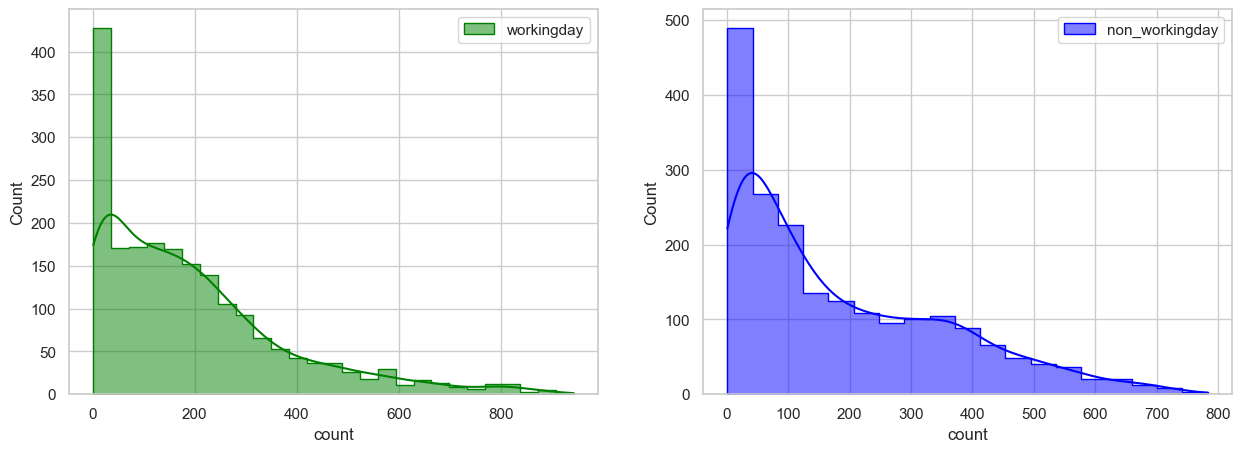

In [44]:
#Let's visually represnt our data to check is samples follow normal distribution

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(yulu_df.loc[yulu_df['workingday'] == 'yes', 'count'].sample(2000), 
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(yulu_df.loc[yulu_df['workingday'] == 'no', 'count'].sample(2000), 
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

##### The distributions do not follow normal distribution

##### Step 2: Checking for basic assumptions of hypothesis

##### * Distribution check using Q-Q plot

##### * Homogenity of variances using levene's test

[]

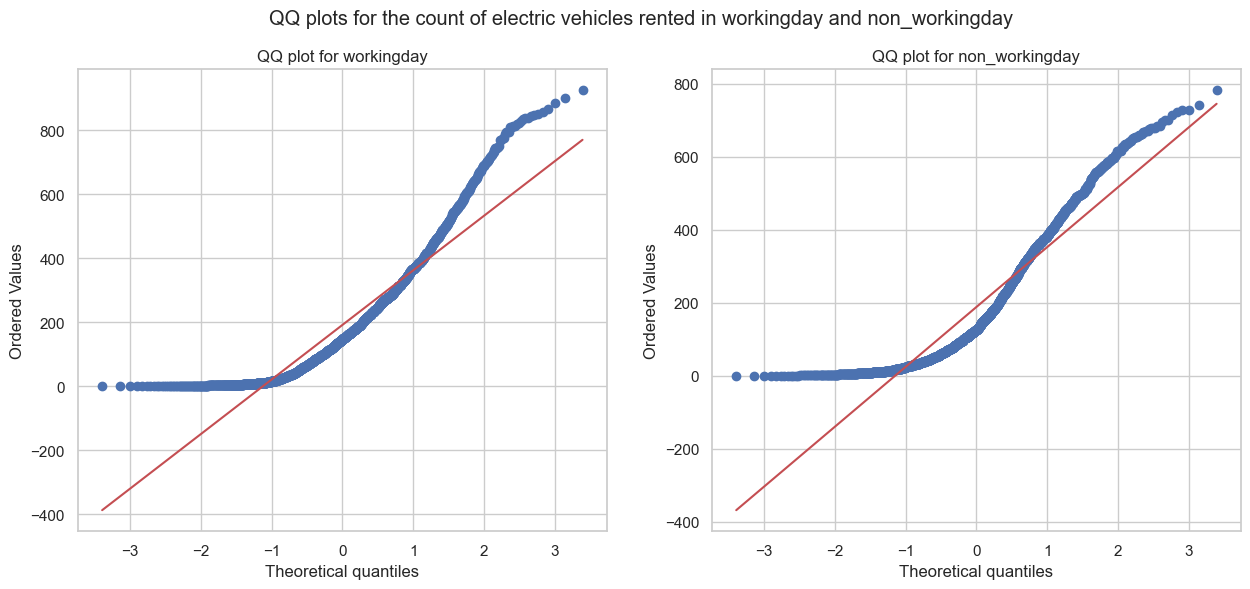

In [45]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
probplot(yulu_df.loc[yulu_df['workingday'] == 'yes', 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
probplot(yulu_df.loc[yulu_df['workingday'] == 'no', 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

#### Workday:

* The Q-Q plot deviates significantly from the straight line, particularly at both tails (ends) of the distribution.
This indicates that the distribution of electric vehicle rentals on workdays is not normally distributed. 

* The heavy deviation at the upper end suggests the presence of outliers or a heavy tail, meaning there are more extreme high values than would be expected under a normal distribution.

* The data points in the middle range follow the line more closely, suggesting that the central portion of the distribution is closer to normal, but overall the distribution has significant skewness or kurtosis.

#### Non-Workday:

* The Q-Q plot for non-workdays also deviates from the straight line, especially in the tails.

* The right tail (upper end) shows a heavy tail, indicating that there are more high-value outliers than would be expected in a normal distribution.

* The deviation is slightly less pronounced in the middle range, but overall, the distribution for non-workdays is also non-normal, with noticeable skewness or kurtosis.

In [46]:
# Applying Shapiro-Wilk test for normality
# H0 : The sample follows normal distribution 
# HA : The sample does not follow normal distribution

# alpha = 0.05

# Test Statistics : Shapiro-Wilk test for normality

In [47]:
test_stat, p_value = shapiro(yulu_df.loc[yulu_df['workingday'] == 'yes', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 2.2205894717483648e-38
The sample does not follow normal distribution


In [48]:
test_stat, p_value = shapiro(yulu_df.loc[yulu_df['workingday'] == 'no', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 8.002347114918764e-36
The sample does not follow normal distribution


In [49]:
# Now, let's use boxcox transformation and check if transformed data follows normal distribution

transformed_workingday = boxcox(yulu_df.loc[yulu_df['workingday'] == 'yes', 'count'])[0]
test_stat, p_value = shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

    
transformed_non_workingday = boxcox(yulu_df.loc[yulu_df['workingday'] == 'no', 'count'])[0]
test_stat, p_value = shapiro(transformed_non_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6132153862898905e-33
The sample does not follow normal distribution
p-value 8.133891151192298e-24
The sample does not follow normal distribution


##### Even after boxcox transformation, samples data not following normal distribution.

In [50]:
# Now let's check homogenity of variance using Lavene's test

# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(yulu_df.loc[yulu_df['workingday'] == 'yes', 'count'].sample(2000),
                                yulu_df.loc[yulu_df['workingday'] == 'no', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.5390046147607925
The samples have Homogenous Variance 


In [51]:
# Since the samples are not normally distributed, we cannot perform t test.We will use Mann-Whitney U Test.

test_stat, p_value = mannwhitneyu(yulu_df.loc[yulu_df['workingday'] == 'yes', 'count'], 
                                      yulu_df.loc[yulu_df['workingday'] == 'no', 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Average no.of electric cycles rented is not same for working and non-working days')
else:
    print('Average no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Average no.of electric cycles rented is same for working and non-working days


#### Therefore, the average count of rented electric cycles count is statistically same for both working and non-working days. Hence, the workingday has no effect on number of electric cycles rented.

### Q2:  The effect of season on number of electric cycles rented

#### Step- 1: Setting up Null & Alternate Hypothesis

##### *Null Hypotheis(H0): Season has no effect on number of cycles rented

##### *Alternate Hypothesis(HA): Season has some effect on the number of cycles rented

In [52]:
# As we have more than two categories in season, we will use ANOVA
# Going by the assumptions of ANOVA, Assumptions for ANOVA are:

# The population data should be normally distributed- The data is to be verified by Wilkin-Shapiro test and the qqplot.


# The data points must be independent- This condition is already satisfied.


# Approximately equal variance within groups- This will be verified using Levene's test.

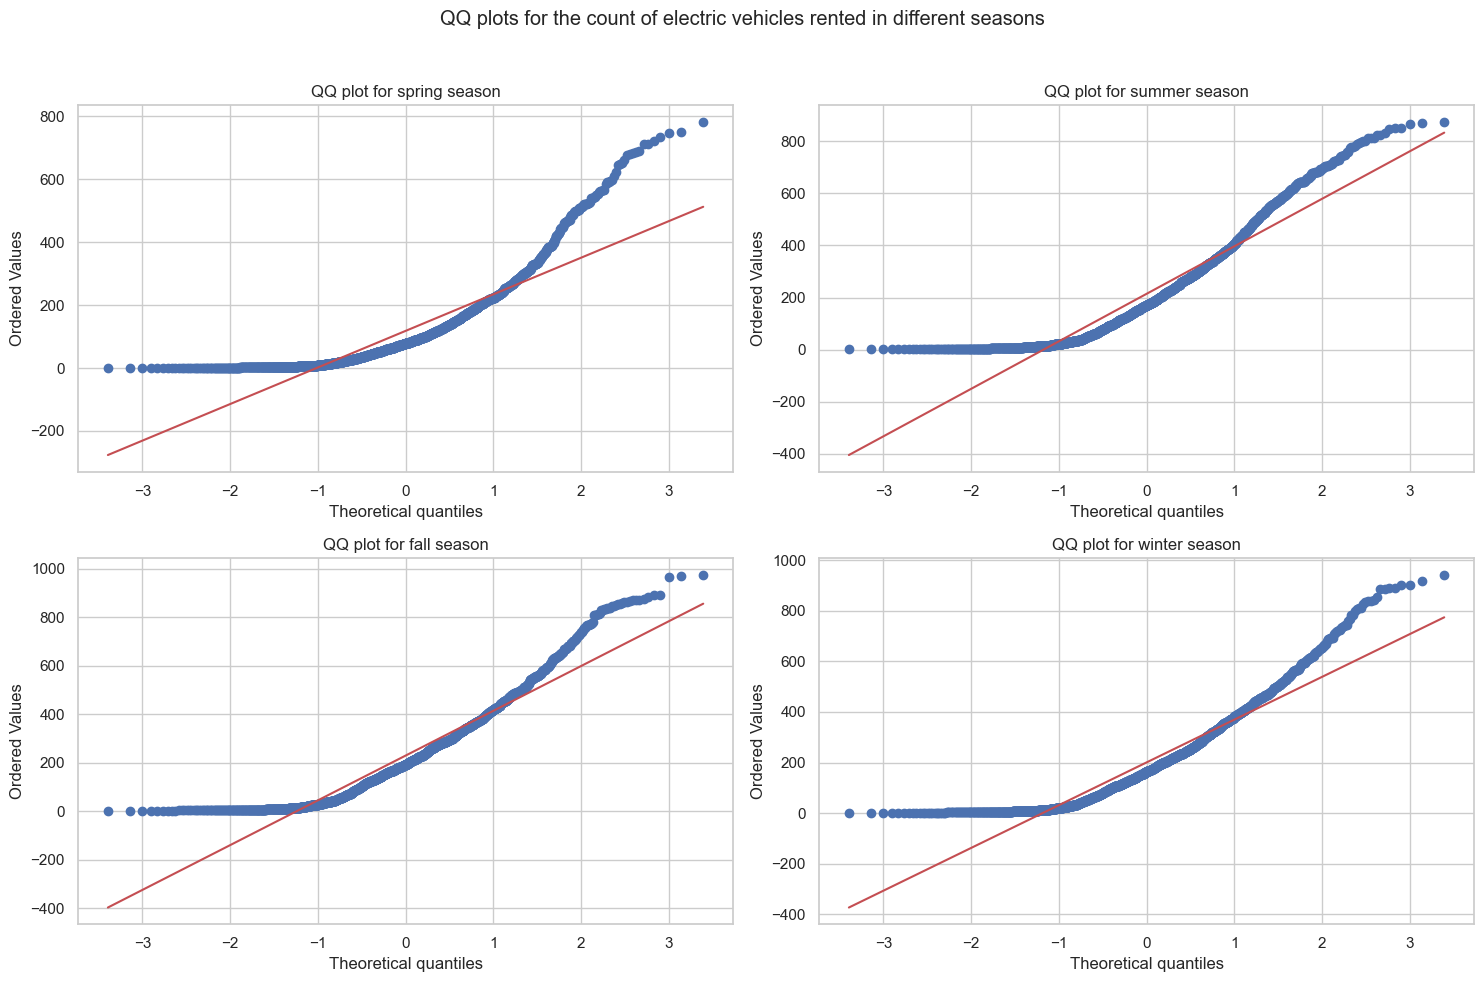

In [53]:
plt.figure(figsize=(15, 10))
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')

# QQ plot for spring season
plt.subplot(2, 2, 1)
probplot(yulu_df.loc[yulu_df['season'] == 'spring', 'count'].sample(2000), plot=plt, dist='norm')
plt.title('QQ plot for spring season')

# QQ plot for summer season
plt.subplot(2, 2, 2)
probplot(yulu_df.loc[yulu_df['season'] == 'summer', 'count'].sample(2000), plot=plt, dist='norm')
plt.title('QQ plot for summer season')

# QQ plot for fall season
plt.subplot(2, 2, 3)
probplot(yulu_df.loc[yulu_df['season'] == 'fall', 'count'].sample(2000), plot=plt, dist='norm')
plt.title('QQ plot for fall season')

# QQ plot for winter season
plt.subplot(2, 2, 4)
probplot(yulu_df.loc[yulu_df['season'] == 'winter', 'count'].sample(2000), plot=plt, dist='norm')
plt.title('QQ plot for winter season')

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

#### Spring Season:

* The QQ plot for the spring season shows a deviation from the normal line, particularly at the tails (both ends of the plot). The points in the middle part of the plot are relatively close to the line, suggesting that the data has a somewhat normal distribution in this central range but with heavy tails, indicating potential outliers or skewness.

#### Summer Season:

* The QQ plot for the summer season also shows deviation from the normal line, especially at the lower end of the distribution. The middle section is fairly aligned with the theoretical quantiles, but there is a significant departure at both tails, suggesting that the data is not normally distributed, with potential outliers or a non-normal pattern in the data.

#### Fall Season:

* The fall season's QQ plot shows a more pronounced deviation from the normal distribution, especially at the high end (right side). This indicates that the distribution of the rental counts in the fall is skewed, with a number of high-value counts that do not follow a normal distribution.

#### Winter Season:

* The QQ plot for the winter season shows a pattern similar to the other seasons, with deviations from the normal line particularly at the tails. Like the other seasons, the winter data is also not normally distributed, especially at the extremes of the distribution.

In [54]:
# Applying Shapiro-Wilk test for normality
# H0 : The sample follows normal distribution 
# HA : The sample does not follow normal distribution

# alpha = 0.05

# Test Statistics : Shapiro-Wilk test for normality

test_stat, p_value = shapiro(yulu_df.loc[yulu_df['season'] == 'spring', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
#.....................
test_stat, p_value = shapiro(yulu_df.loc[yulu_df['season'] == 'summer', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')
#......................
test_stat, p_value = shapiro(yulu_df.loc[yulu_df['season'] == 'fall', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')
#.......................
test_stat, p_value = shapiro(yulu_df.loc[yulu_df['season'] == 'winter', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1579996350602183e-43
The sample does not follow normal distribution
p-value 2.0967891962229573e-34
The sample does not follow normal distribution
p-value 2.654410242214701e-32
The sample does not follow normal distribution
p-value 1.5355592907386931e-34
The sample does not follow normal distribution


In [55]:
# Now let's check homogenity of variance using Lavene's test

# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(yulu_df.loc[yulu_df['season'] == 'spring', 'count'].sample(2000),
                                yulu_df.loc[yulu_df['season'] == 'summer', 'count'].sample(2000),
                           yulu_df.loc[yulu_df['season'] == 'fall', 'count'].sample(2000),
                           yulu_df.loc[yulu_df['season'] == 'winter', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 3.918634662412829e-82
The samples do not have  Homogenous Variance


In [56]:
# Let's perform ANOVA and Kruskal test
# Let's set Hypothesis for ANOVA
# H0: There is no significant difference between demand of bicycles for different Seasons
# HA: There is a significant difference between demand of bicycles for different Seasons

anova_stat, p_value = f_oneway(yulu_df.loc[yulu_df['season'] == 'spring', 'count'].sample(2000),
                                yulu_df.loc[yulu_df['season'] == 'summer', 'count'].sample(2000),
                           yulu_df.loc[yulu_df['season'] == 'fall', 'count'].sample(2000),
                           yulu_df.loc[yulu_df['season'] == 'winter', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('There is a significant difference between demand of bicycles for different Seasons')
else:
    print('There is no significant difference between demand of bicycles for different Seasons') 

p-value 1.0463019481711659e-104
There is a significant difference between demand of bicycles for different Seasons


In [57]:
# Kruskal test
kruskal_stat, p_value = kruskal(yulu_df.loc[yulu_df['season'] == 'spring', 'count'].sample(2000),
                                yulu_df.loc[yulu_df['season'] == 'summer', 'count'].sample(2000),
                           yulu_df.loc[yulu_df['season'] == 'fall', 'count'].sample(2000),
                           yulu_df.loc[yulu_df['season'] == 'winter', 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('There is a significant difference between demand of bicycles for different Seasons')
else:
    print('There is no significant difference between demand of bicycles for different Seasons') 

p-value 1.1920366172942188e-111
There is a significant difference between demand of bicycles for different Seasons


#### Therefore, Season has some effect on the number of cycles rented

### Q3:  The effect of weather on number of electric cycles rented

#### Step- 1: Setting up Null & Alternate Hypothesis

##### *Null Hypotheis(H0): Weather has no effect on number of cycles rented

##### *Alternate Hypothesis(HA): Weather has some effect on the number of cycles rented

In [58]:
# As we have more than two categories in season, we will use ANOVA
# Going by the assumptions of ANOVA, Assumptions for ANOVA are:

# The population data should be normally distributed- The data is to be verified by Wilkin-Shapiro test and the qqplot.


# The data points must be independent- This condition is already satisfied.


# Approximately equal variance within groups- This will be verified using Levene's test.

# The heavy rain weather has shown only one instance of bike rental so we will not include that in our analysis

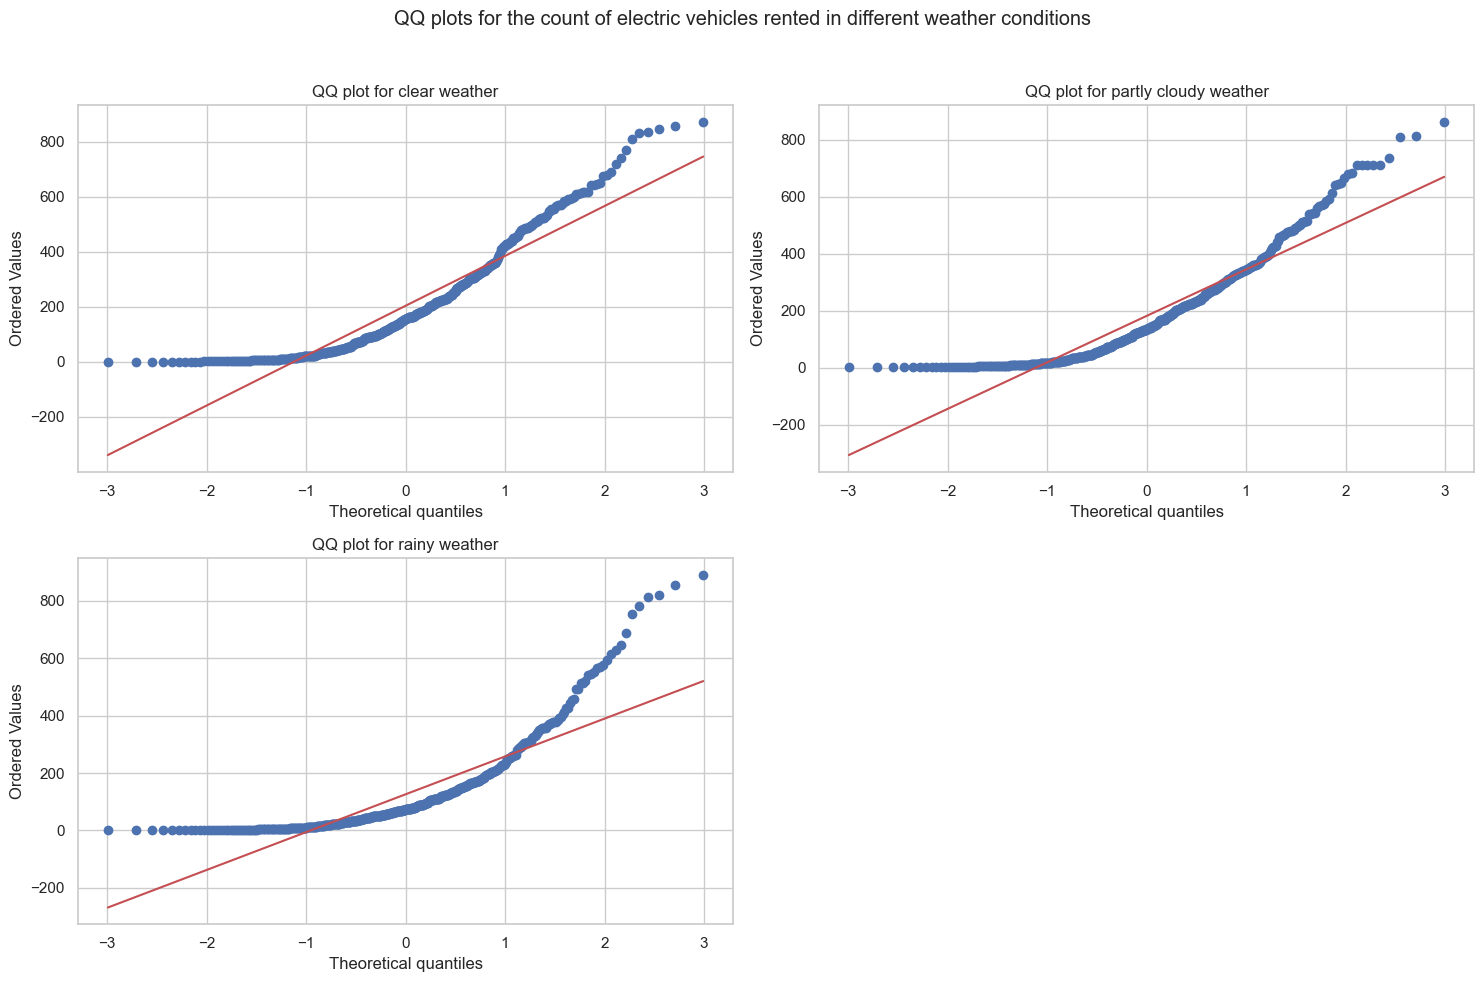

In [59]:
plt.figure(figsize=(15, 10))
plt.suptitle('QQ plots for the count of electric vehicles rented in different weather conditions')

# QQ plot for clear weather
plt.subplot(2, 2, 1)
probplot(yulu_df.loc[yulu_df['weather'] == 'clear', 'count'].sample(500), plot=plt, dist='norm')
plt.title('QQ plot for clear weather')

# QQ plot for partly cloudy weather
plt.subplot(2, 2, 2)
probplot(yulu_df.loc[yulu_df['weather'] == 'partly_cloudy', 'count'].sample(500), plot=plt, dist='norm')
plt.title('QQ plot for partly cloudy weather')

# QQ plot for rainy weather
plt.subplot(2, 2, 3)
probplot(yulu_df.loc[yulu_df['weather'] == 'rain', 'count'].sample(500), plot=plt, dist='norm')
plt.title('QQ plot for rainy weather')

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

1. Clear Weather:

* The QQ plot for clear weather shows a noticeable deviation from the theoretical normal distribution, especially in the tails.
* The left tail (lower quantiles) and right tail (upper quantiles) of the distribution deviate significantly from the line, indicating that the distribution has heavier tails than a normal distribution.This suggests that under clear weather, the number of rentals does not follow a normal distribution, potentially indicating the presence of outliers or a skewed distribution.

2. Partly Cloudy Weather:

* The QQ plot for partly cloudy weather also deviates from the normal line, with a similar pattern to clear weather. The deviations are most pronounced in the lower and upper ends of the distribution, suggesting that the rentals under partly cloudy conditions also do not follow a normal distribution. This could indicate the presence of extreme values or non-normality in the data.

3. Rainy Weather:

* The QQ plot for rainy weather shows deviations from the normal line, particularly in the tails. The lower quantiles show some deviation, and the upper tail deviates more significantly from the theoretical normal distribution line. Similar to the other weather conditions, this indicates that the data is not normally distributed and may be influenced by outliers or a non-normal distribution pattern.

In [60]:
# Applying Shapiro-Wilk test for normality
# H0 : The sample follows normal distribution 
# HA : The sample does not follow normal distribution

# alpha = 0.05

# Test Statistics : Shapiro-Wilk test for normality

test_stat, p_value = shapiro(yulu_df.loc[yulu_df['weather'] == 'clear', 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 
#.....................
test_stat, p_value = shapiro(yulu_df.loc[yulu_df['weather'] == 'partly_cloudy', 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')
#......................
test_stat, p_value = shapiro(yulu_df.loc[yulu_df['weather'] == 'rain', 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.5967612727476662e-18
The sample does not follow normal distribution
p-value 2.421745403542022e-20
The sample does not follow normal distribution
p-value 9.958479611004154e-26
The sample does not follow normal distribution


In [61]:
# Now let's check homogenity of variance using Lavene's test

# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = levene(yulu_df.loc[yulu_df['weather'] == 'clear', 'count'].sample(500),
                                yulu_df.loc[yulu_df['weather'] == 'partly_cloudy', 'count'].sample(500),
                           yulu_df.loc[yulu_df['weather'] == 'rain', 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 6.271775290629821e-12
The samples do not have  Homogenous Variance


In [62]:
# Let's perform ANOVA and Kruskal test
# Let's set Hypothesis for ANOVA
# H0: There is no significant difference between demand of bicycles for different Seasons
# HA: There is a significant difference between demand of bicycles for different Seasons

anova_stat, p_value = f_oneway(yulu_df.loc[yulu_df['weather'] == 'clear', 'count'].sample(500),
                                yulu_df.loc[yulu_df['weather'] == 'partly_cloudy', 'count'].sample(500),
                           yulu_df.loc[yulu_df['weather'] == 'rain', 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('There is a significant difference between demand of bicycles for different Seasons')
else:
    print('There is no significant difference between demand of bicycles for different Seasons') 

p-value 4.3016780571568224e-14
There is a significant difference between demand of bicycles for different Seasons


In [63]:
# Kruskal test
kruskal_stat, p_value = kruskal(yulu_df.loc[yulu_df['weather'] == 'clear', 'count'].sample(500),
                                yulu_df.loc[yulu_df['weather'] == 'partly_cloudy', 'count'].sample(500),
                           yulu_df.loc[yulu_df['weather'] == 'rain', 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('There is a significant difference between demand of bicycles for different Seasons')
else:
    print('There is no significant difference between demand of bicycles for different Seasons') 

p-value 3.078891861361096e-14
There is a significant difference between demand of bicycles for different Seasons


#### Therefore, weather conditions has some effect on the number of cycles rented.

### Q4:  The dependency of weather conditions on different season

#### Step- 1: Setting up Null & Alternate Hypothesis

##### *Null Hypotheis(H0): Weather conditions are independent of different seasons

##### *Alternate Hypothesis(HA): Weather conditions are dependent on different seasons

In [64]:
# As we are checking the two categorical variables, we will use chi-square test

# Step 1: let's create a contingency table
contingency_table = pd.crosstab(yulu_df['weather'], yulu_df['season'])

# Step 2: Now let's Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Step 3: Interpretation
if p_val < 0.05:
    print("Reject the Null Hypothesis - Weather conditions are dependent on different seasons.")
else:
    print("Fail to Reject the Null Hypothesis - weather conditions are independent of different seasons.")

Chi-Square Statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
Degrees of Freedom: 9
Expected Frequencies:
 [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Reject the Null Hypothesis - Weather conditions are dependent on different seasons.


#### Therefore, weather conditions are dependent on different seasons.

### <span style="color:green">Task 3: Actionable Insights</span>

#### * Weather and seasons are dependent on each other.

#### * On Clear Weather conditio, rental bike counts are maximum.

#### * Rental bike counts are higher in fall and winter seasons.

#### * There is no statistical difference in the avg. of the rental bikes on working days and non-working days

#### * Count of rented cycles are dependent upon weather conditions and in different seasons.

### <span style="color:green">Task 4: Recommendations</span>

####  * During spring, Yulu should provide some discounts and offers to increase the use of rental bikes.

####  * During weather of rain, The mean of total rental bikes is lower than others. As Yulu provides bike services, customers can't use it in rainy times. so Yulu should provide some cab services during this weather.

####  * As humidity increases the total number of rental bikes decreases, so, Yulu should provide benefits during these humid days.

####  * Yulu can increase the use of rental bikes by providing some city tour offers, events, or campaigns during non-working days.

#### * Yulu can convert its casual users to registered users by providing some discounts or registration offers to convert casual users to registered users.

#### * As mostly there is clear weather, Yulu should focus on the increase in total rental bikes during clear weather days.